In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

In [2]:
def preprocess_data(data, target, is_classification=True):
    X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=0.3, random_state=42, stratify=target if is_classification else None
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    if is_classification:
        encoder = OneHotEncoder(sparse_output=False)
        y_train = encoder.fit_transform(y_train.reshape(-1, 1))
        y_test = encoder.transform(y_test.reshape(-1, 1))

    return X_train, X_test, y_train, y_test

**RELU**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 358ms/step


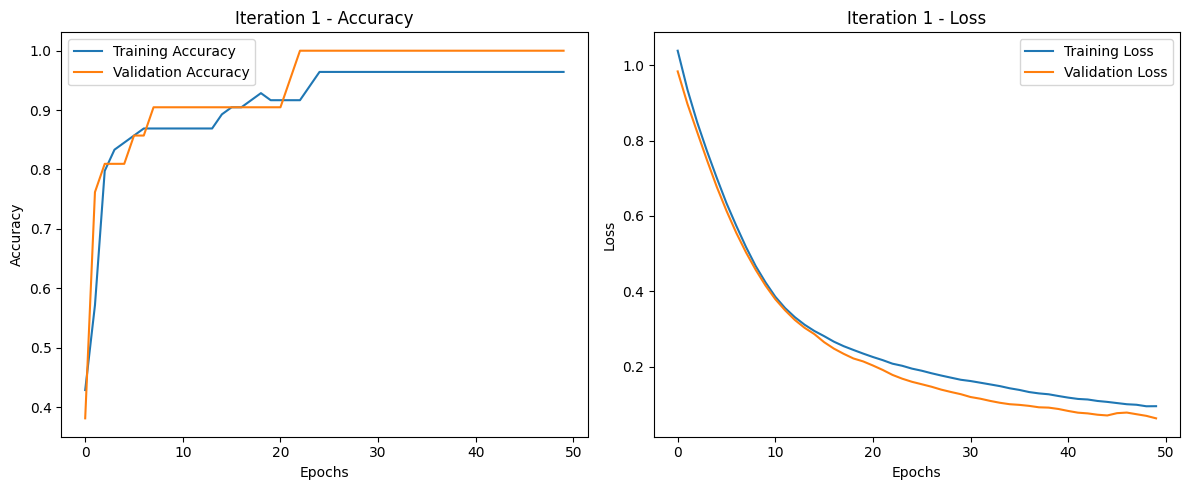

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


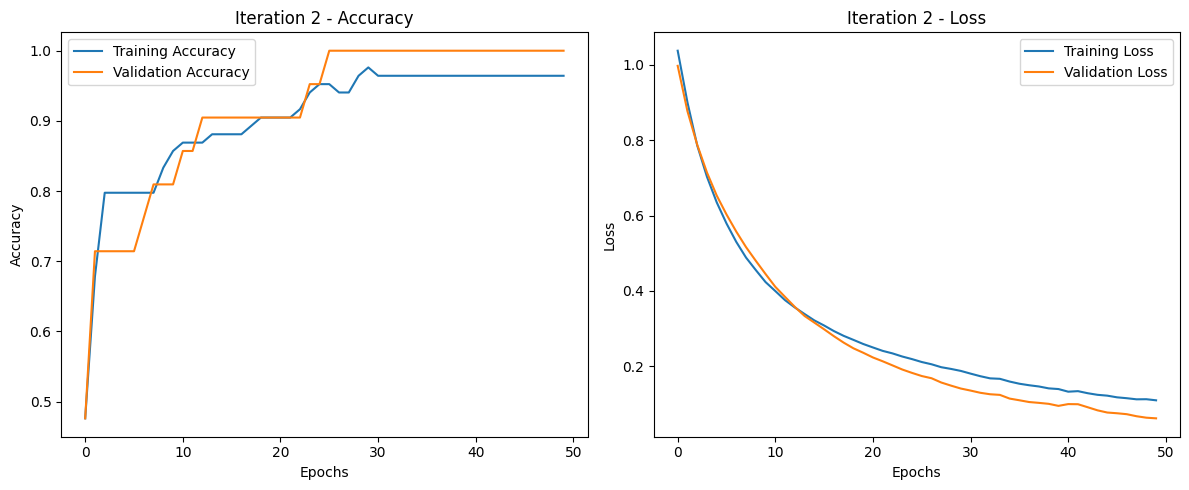

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


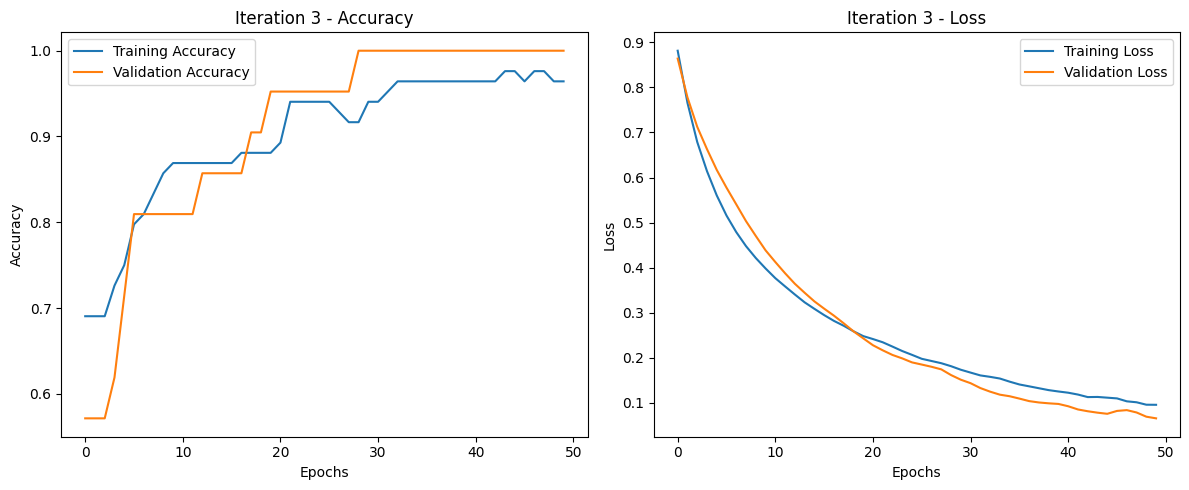


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8199
  recall: 0.9111
  f1-score: 0.8629
  support: 15.0000
2:
  precision: 0.9011
  recall: 0.8000
  f1-score: 0.8473
  support: 15.0000
accuracy: 0.9037
macro avg:
  precision: 0.9070
  recall: 0.9037
  f1-score: 0.9034
  support: 45.0000
weighted avg:
  precision: 0.9070
  recall: 0.9037
  f1-score: 0.9034
  support: 45.0000


In [3]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.zeros_like(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


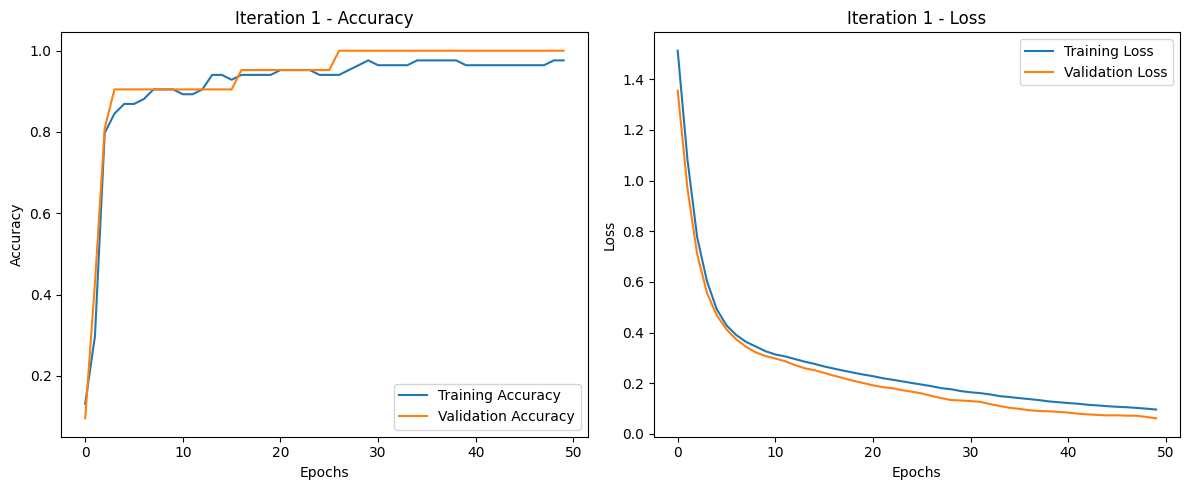

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


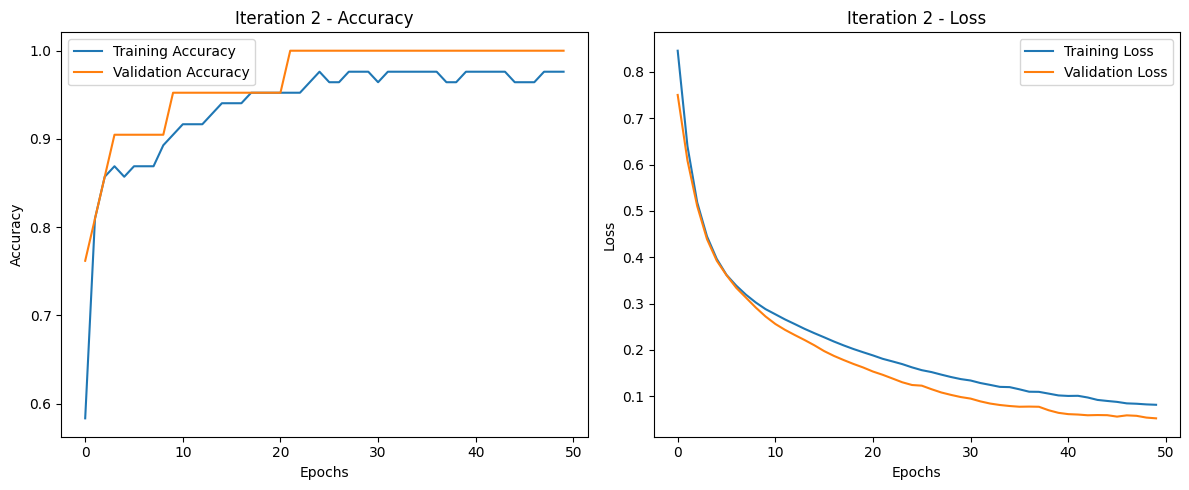

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


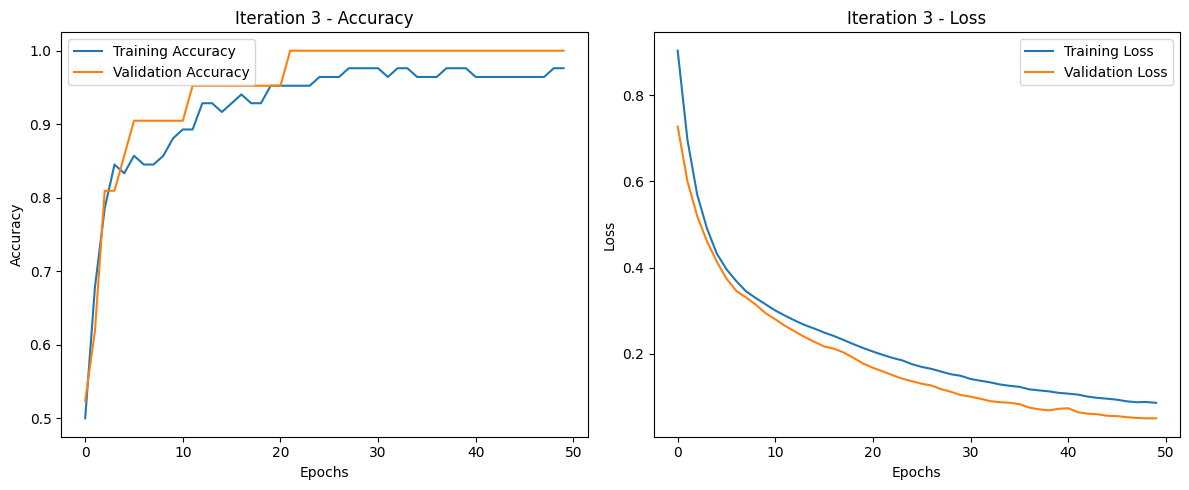


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8407
  recall: 0.9333
  f1-score: 0.8844
  support: 15.0000
2:
  precision: 0.9249
  recall: 0.8222
  f1-score: 0.8703
  support: 15.0000
accuracy: 0.9185
macro avg:
  precision: 0.9219
  recall: 0.9185
  f1-score: 0.9182
  support: 45.0000
weighted avg:
  precision: 0.9219
  recall: 0.9185
  f1-score: 0.9182
  support: 45.0000


In [4]:
def piecewise_activation(x):
    return tf.keras.activations.tanh(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


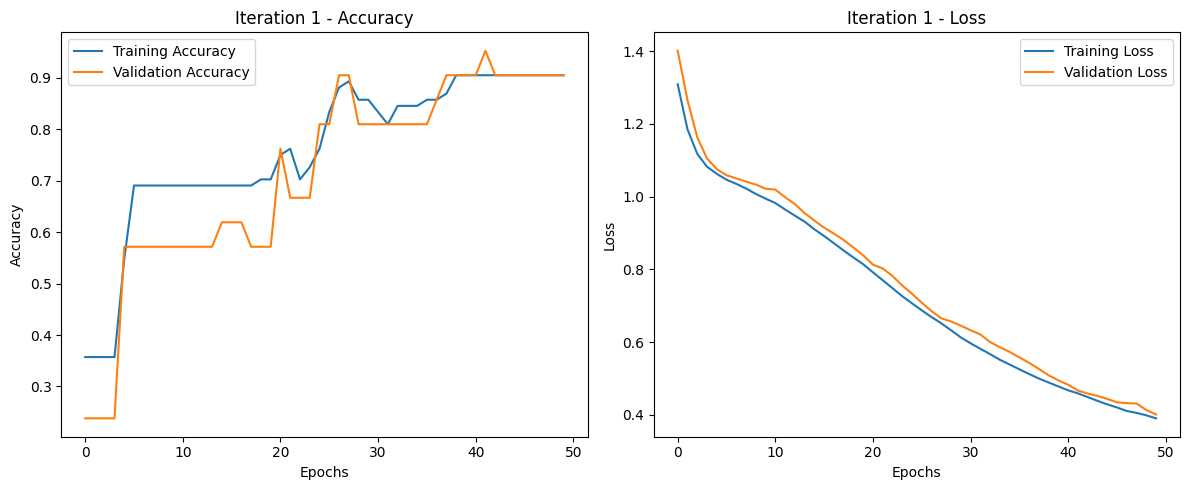

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


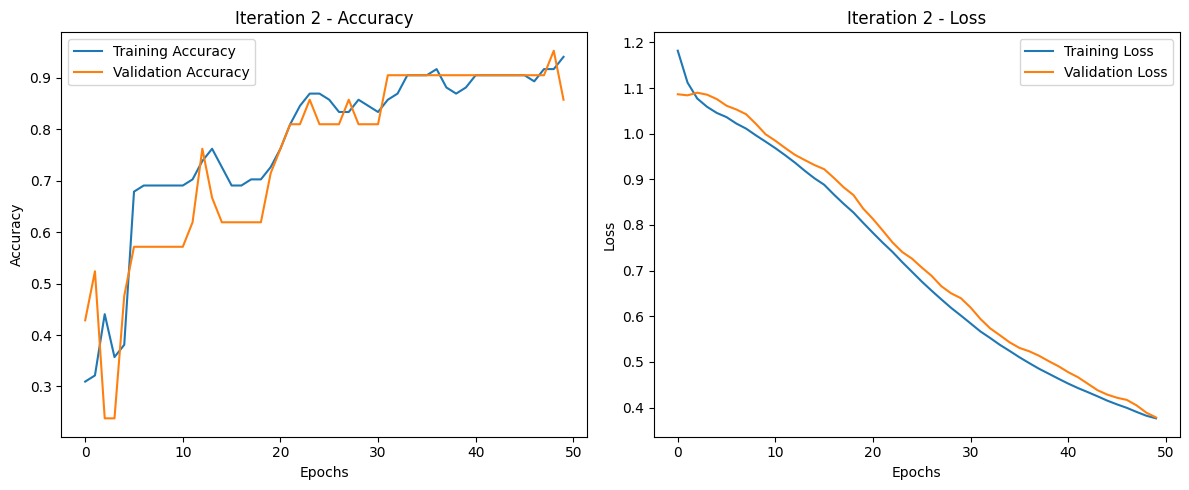

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


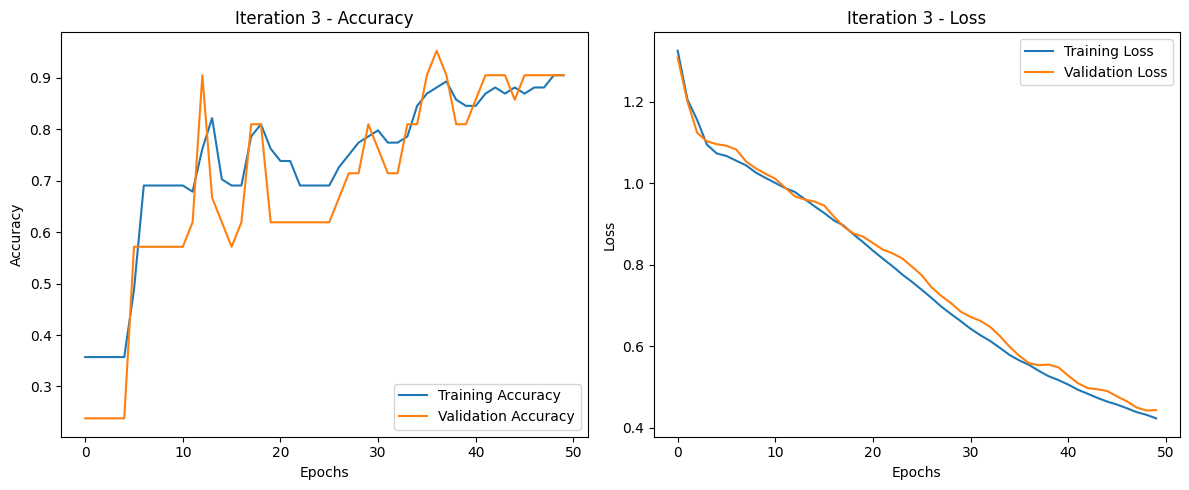


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8651
  recall: 0.7778
  f1-score: 0.8039
  support: 15.0000
2:
  precision: 0.8194
  recall: 0.8667
  f1-score: 0.8319
  support: 15.0000
accuracy: 0.8815
macro avg:
  precision: 0.8948
  recall: 0.8815
  f1-score: 0.8786
  support: 45.0000
weighted avg:
  precision: 0.8948
  recall: 0.8815
  f1-score: 0.8786
  support: 45.0000


In [5]:
def piecewise_activation(x):
    return tf.keras.activations.sigmoid(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


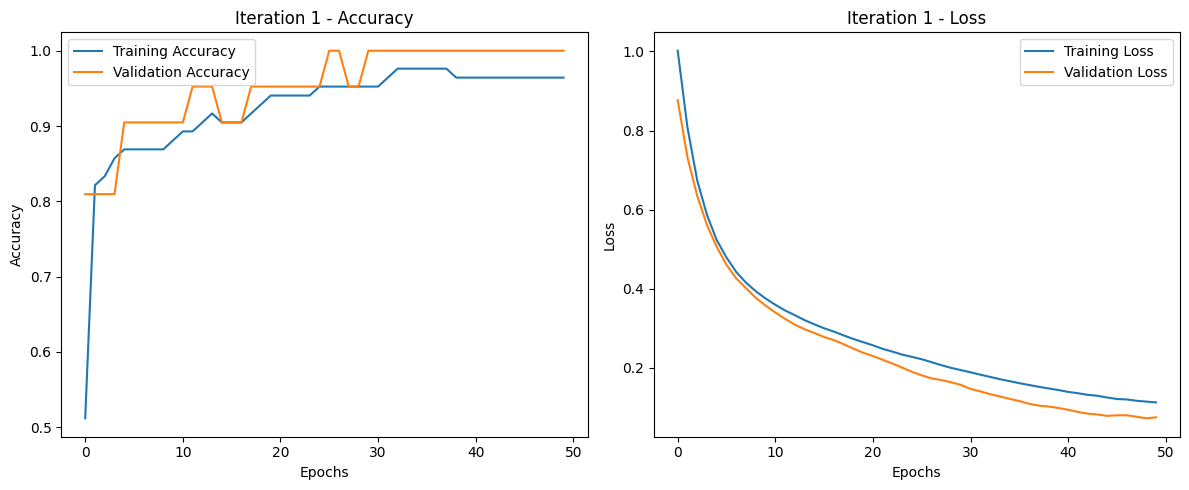

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


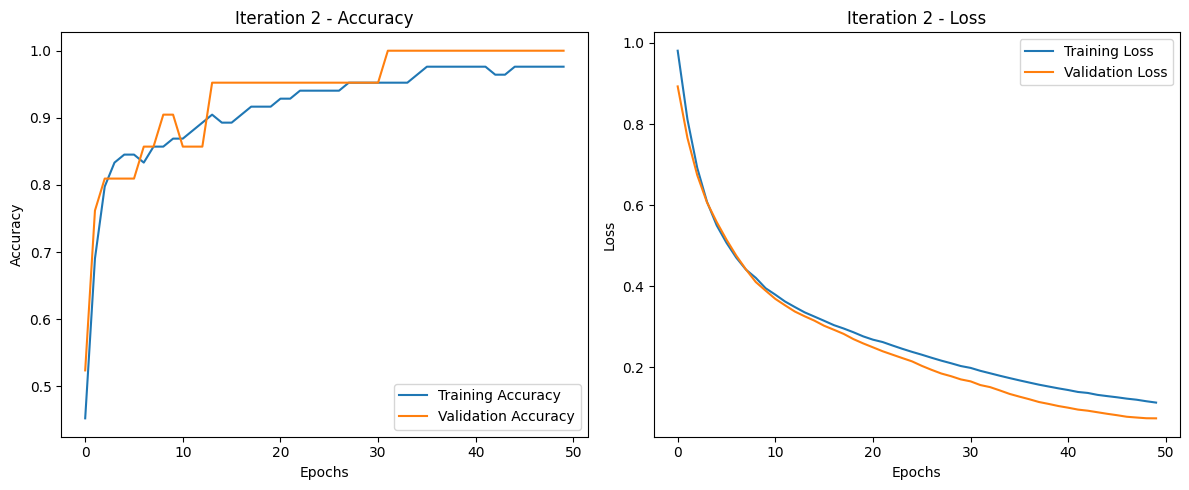

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


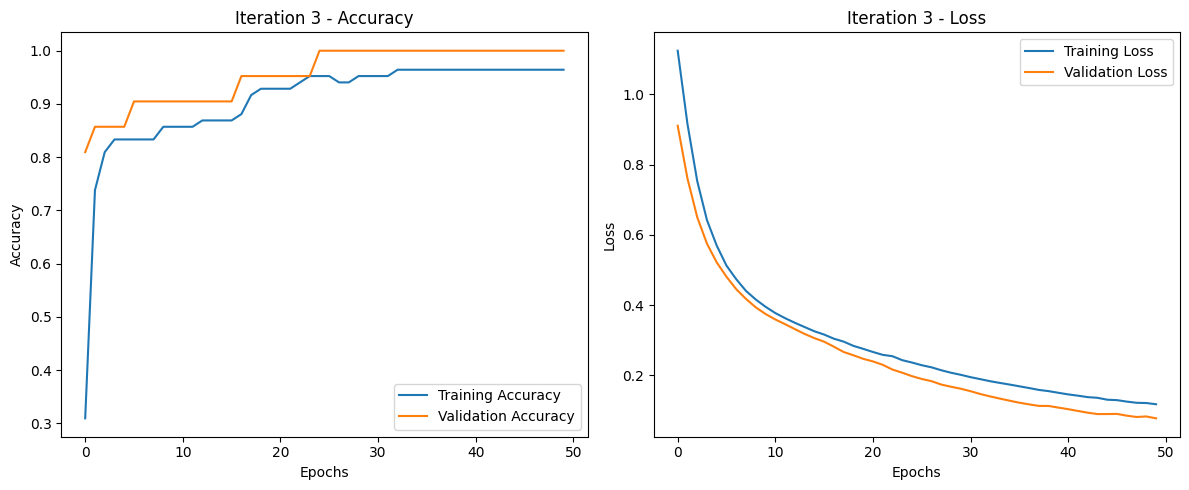


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8773
  recall: 0.9333
  f1-score: 0.9039
  support: 15.0000
2:
  precision: 0.9283
  recall: 0.8667
  f1-score: 0.8957
  support: 15.0000
accuracy: 0.9333
macro avg:
  precision: 0.9352
  recall: 0.9333
  f1-score: 0.9332
  support: 45.0000
weighted avg:
  precision: 0.9352
  recall: 0.9333
  f1-score: 0.9332
  support: 45.0000


In [6]:
def piecewise_activation(x):
    return tf.keras.activations.softsign(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


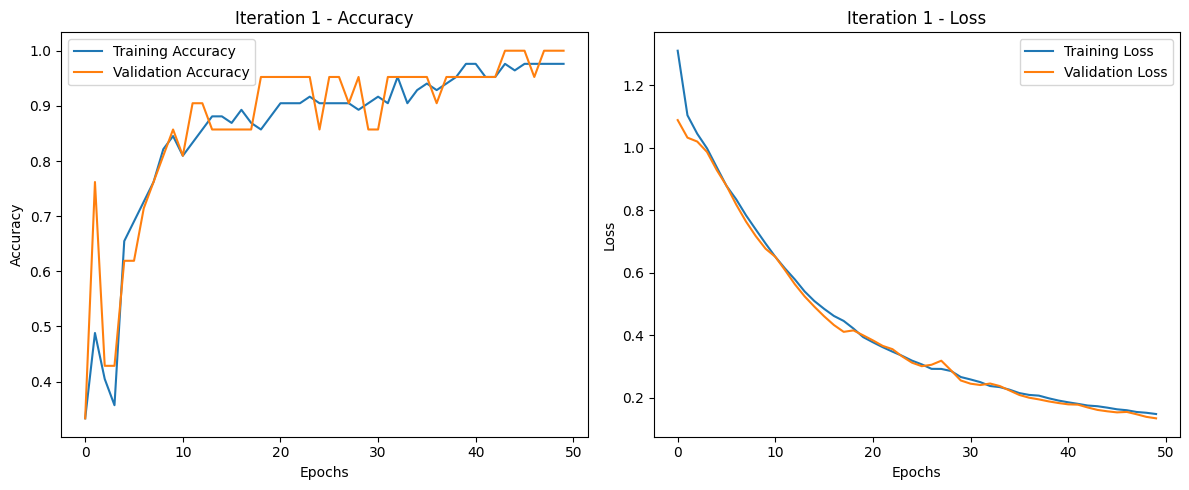

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


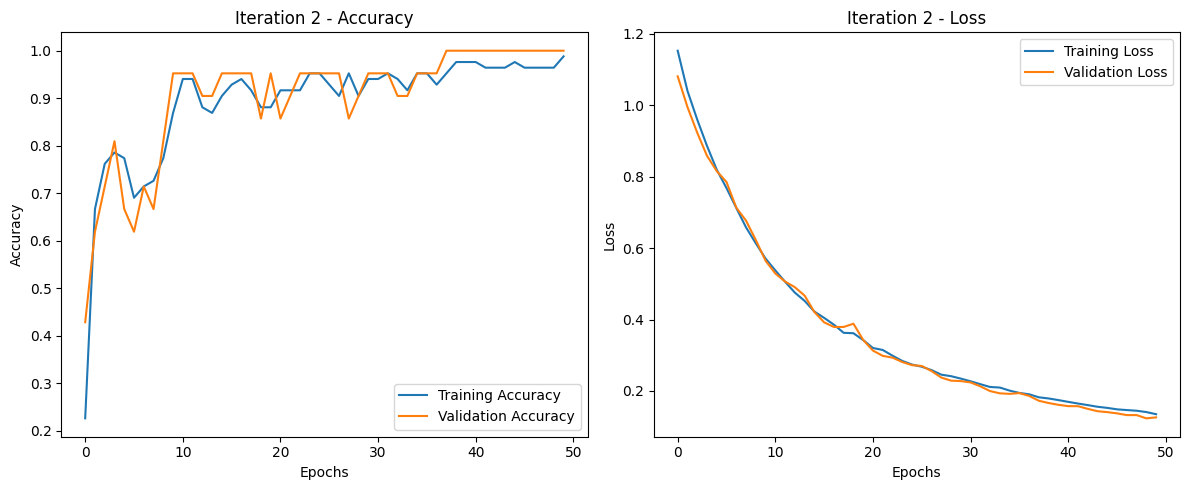

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


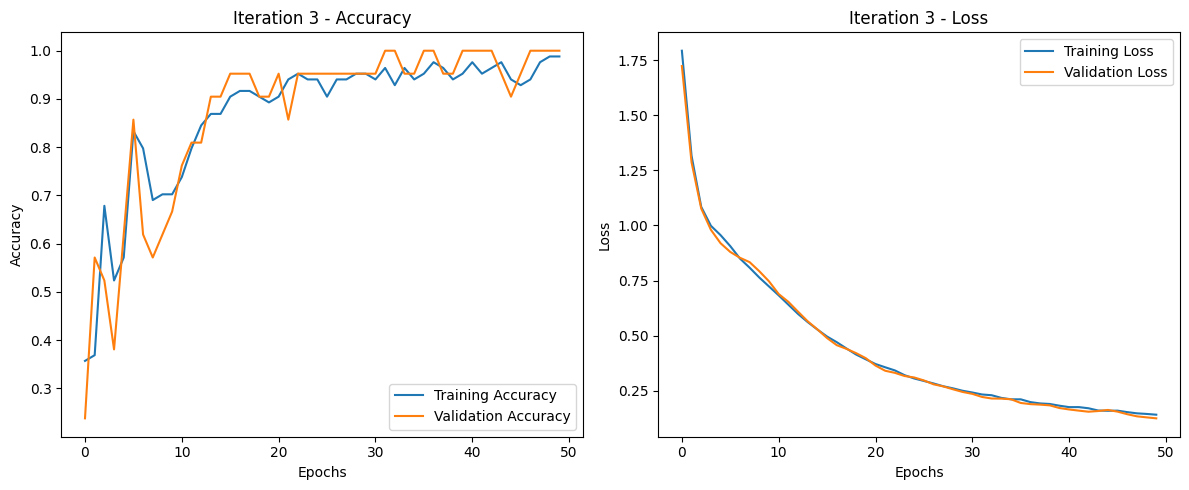


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8102
  recall: 0.9333
  f1-score: 0.8667
  support: 15.0000
2:
  precision: 0.9206
  recall: 0.7778
  f1-score: 0.8421
  support: 15.0000
accuracy: 0.9037
macro avg:
  precision: 0.9103
  recall: 0.9037
  f1-score: 0.9029
  support: 45.0000
weighted avg:
  precision: 0.9103
  recall: 0.9037
  f1-score: 0.9029
  support: 45.0000


In [7]:
def piecewise_activation(x):
    return tf.keras.activations.softplus(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


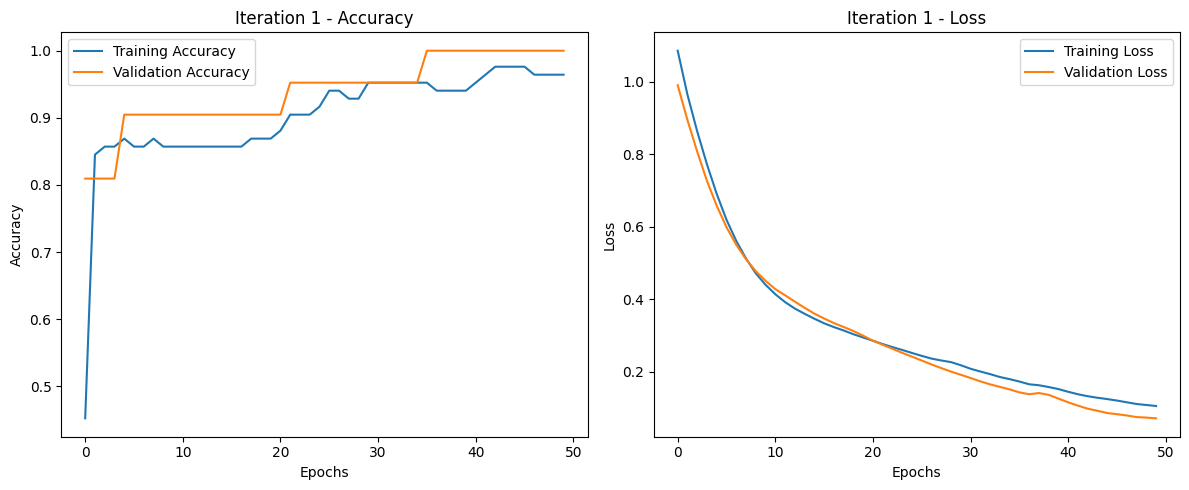

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


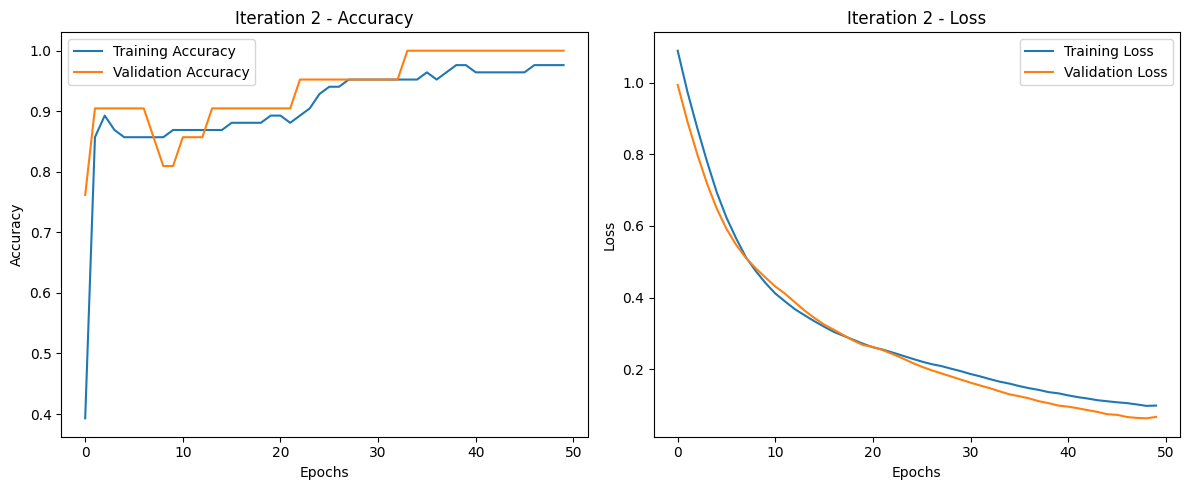

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


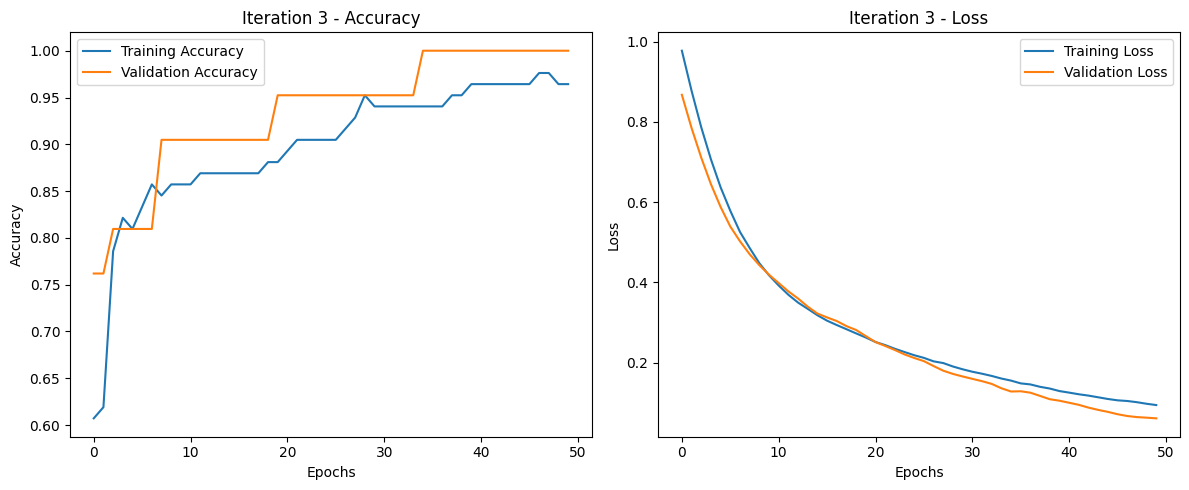


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8750
  recall: 0.9333
  f1-score: 0.9032
  support: 15.0000
2:
  precision: 0.9286
  recall: 0.8667
  f1-score: 0.8966
  support: 15.0000
accuracy: 0.9333
macro avg:
  precision: 0.9345
  recall: 0.9333
  f1-score: 0.9333
  support: 45.0000
weighted avg:
  precision: 0.9345
  recall: 0.9333
  f1-score: 0.9333
  support: 45.0000


In [8]:
def piecewise_activation(x):
    return tf.keras.activations.swish(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step


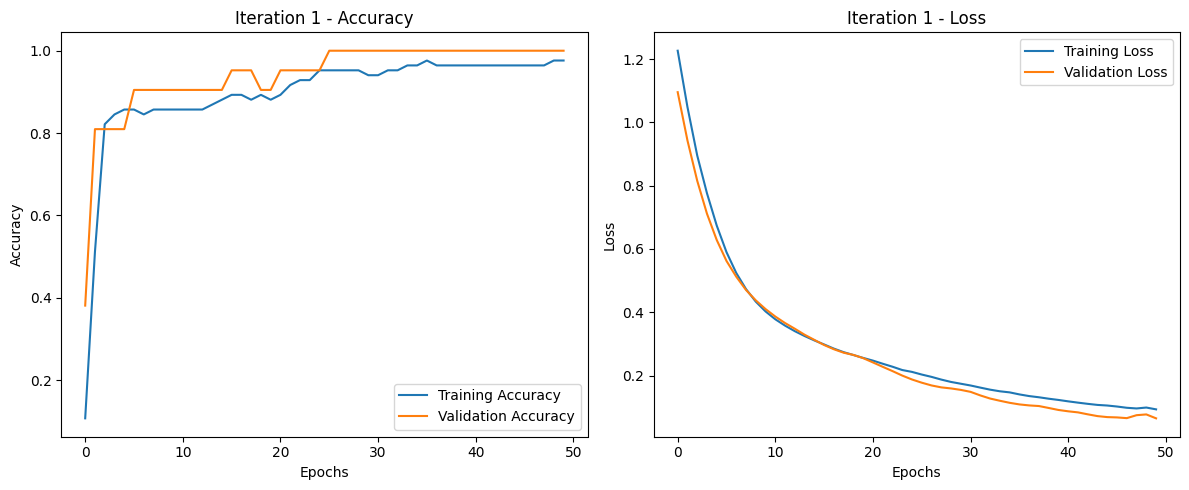

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


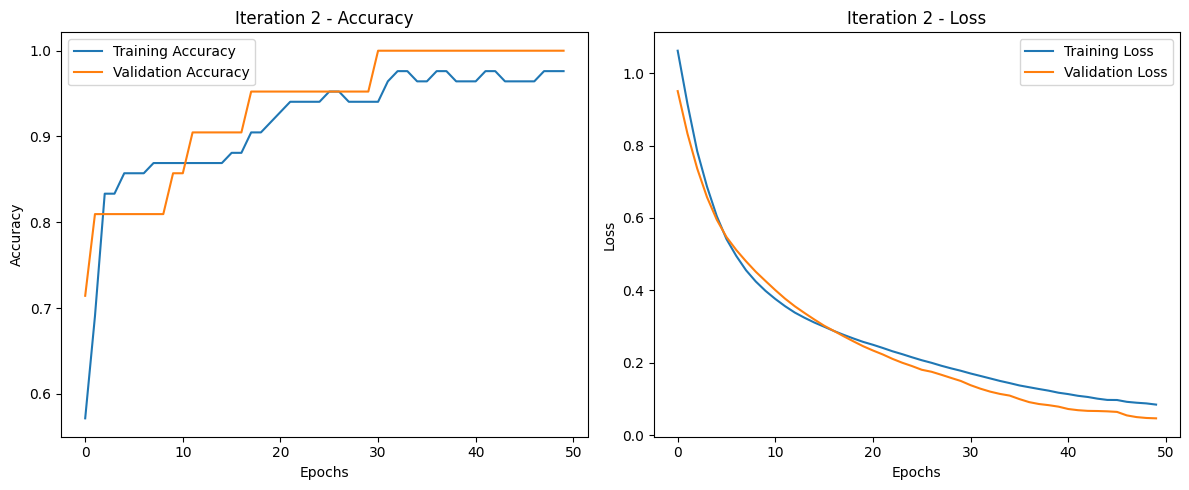

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


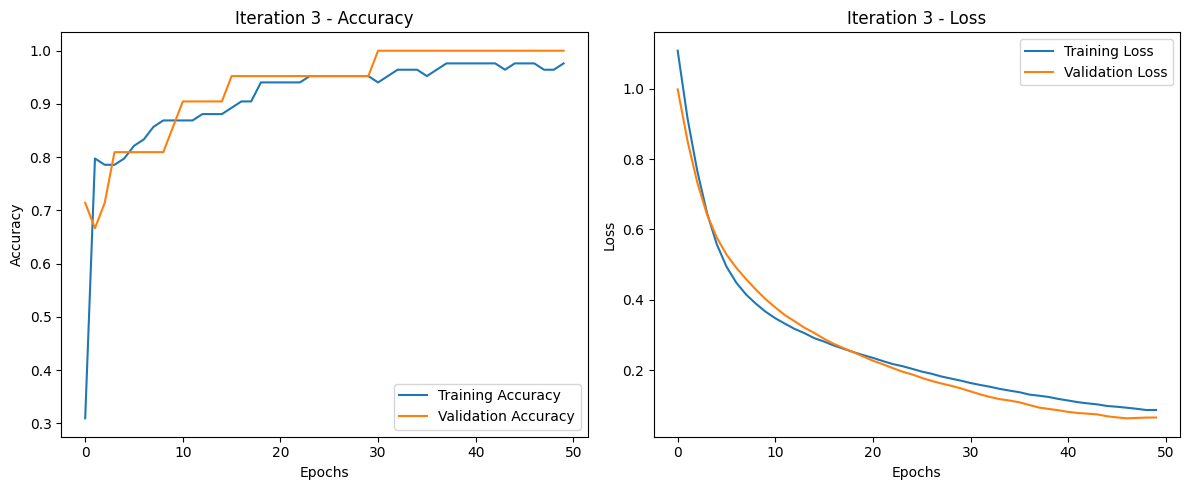


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8601
  recall: 0.9333
  f1-score: 0.8944
  support: 15.0000
2:
  precision: 0.9265
  recall: 0.8444
  f1-score: 0.8825
  support: 15.0000
accuracy: 0.9259
macro avg:
  precision: 0.9289
  recall: 0.9259
  f1-score: 0.9257
  support: 45.0000
weighted avg:
  precision: 0.9289
  recall: 0.9259
  f1-score: 0.9257
  support: 45.0000


In [9]:
def piecewise_activation(x):
    return tf.keras.activations.mish(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


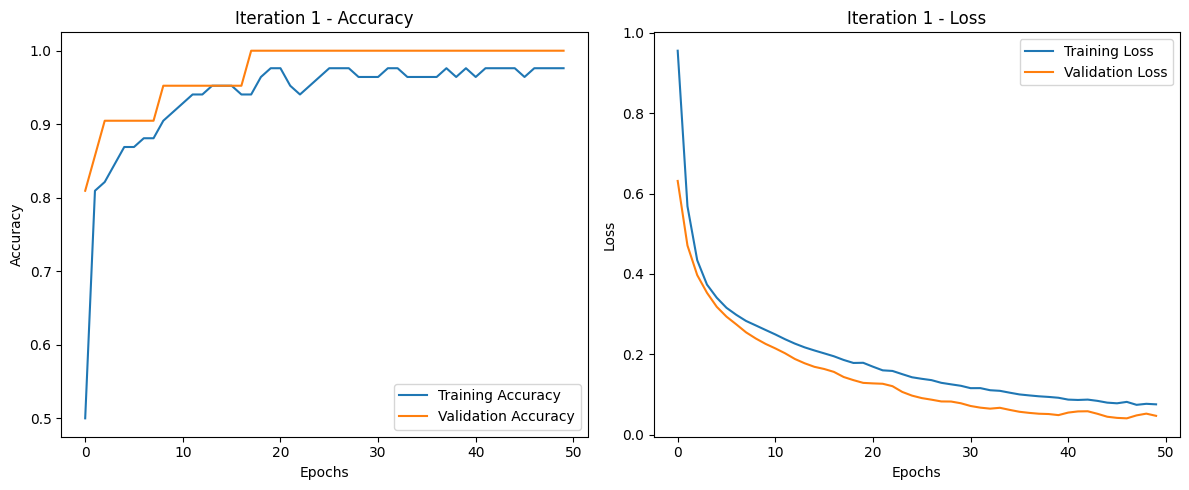

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


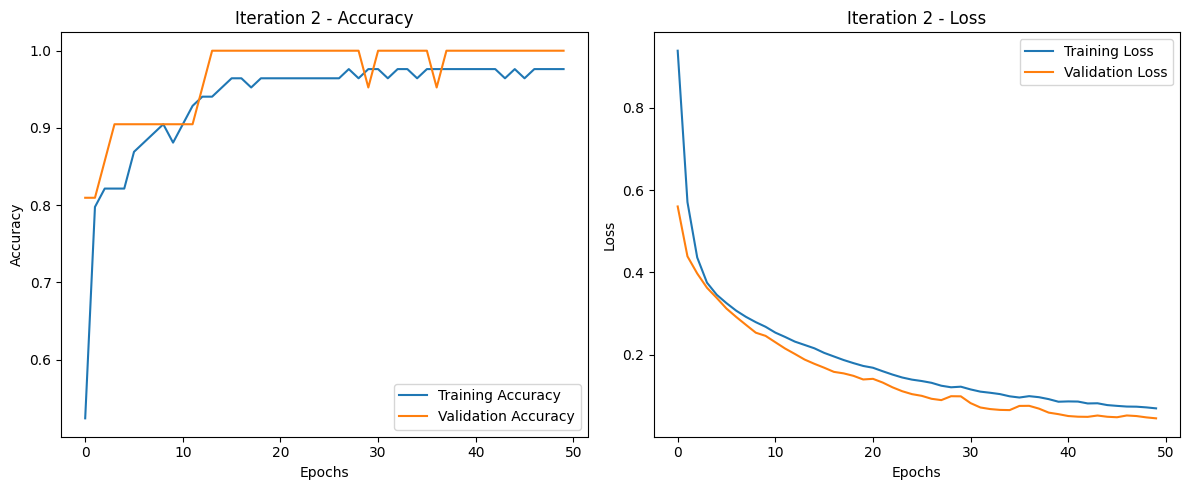

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


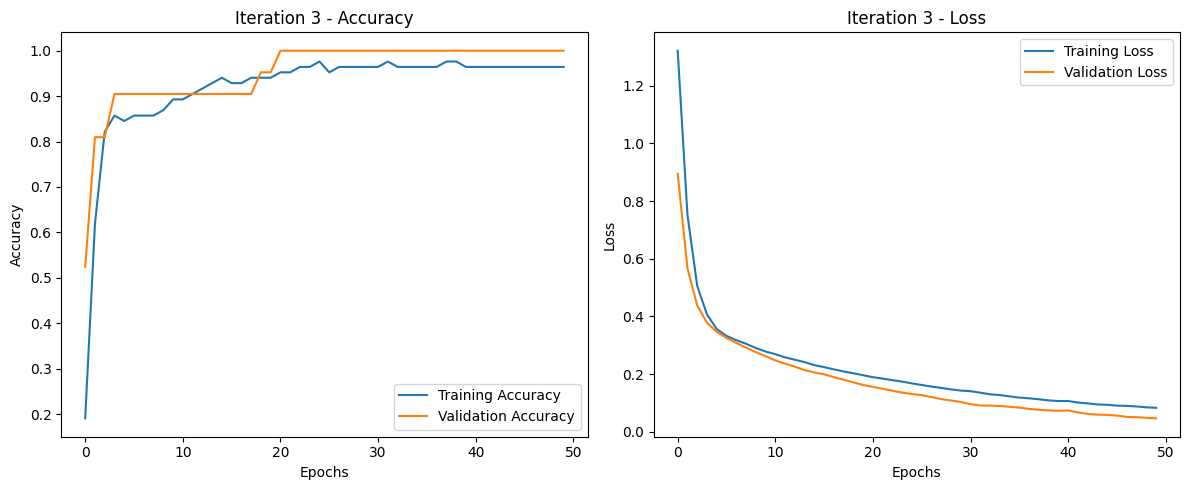


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8407
  recall: 0.9333
  f1-score: 0.8844
  support: 15.0000
2:
  precision: 0.9249
  recall: 0.8222
  f1-score: 0.8703
  support: 15.0000
accuracy: 0.9185
macro avg:
  precision: 0.9219
  recall: 0.9185
  f1-score: 0.9182
  support: 45.0000
weighted avg:
  precision: 0.9219
  recall: 0.9185
  f1-score: 0.9182
  support: 45.0000


In [10]:
def piecewise_activation(x):
    return tf.keras.activations.selu(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


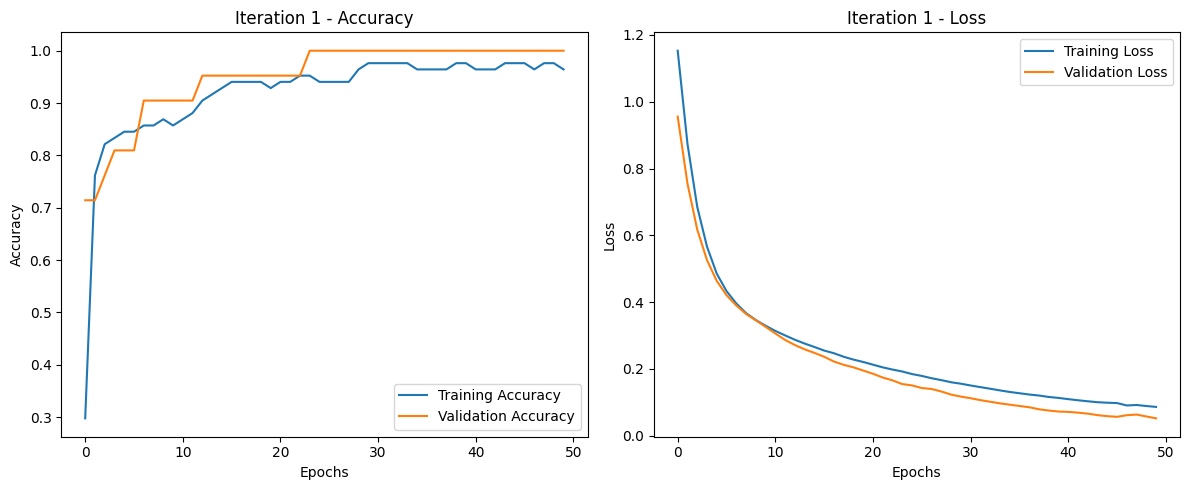

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


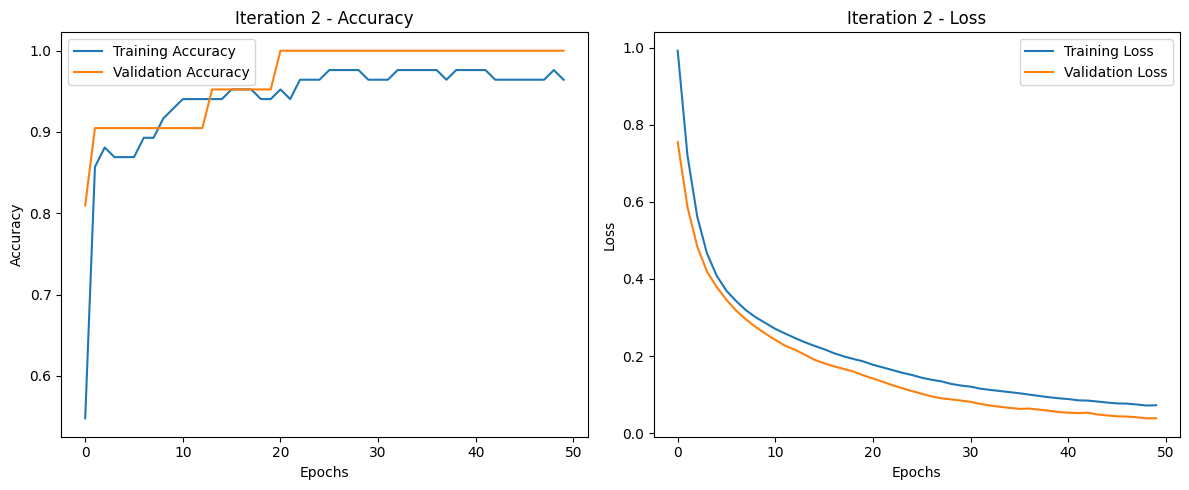

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


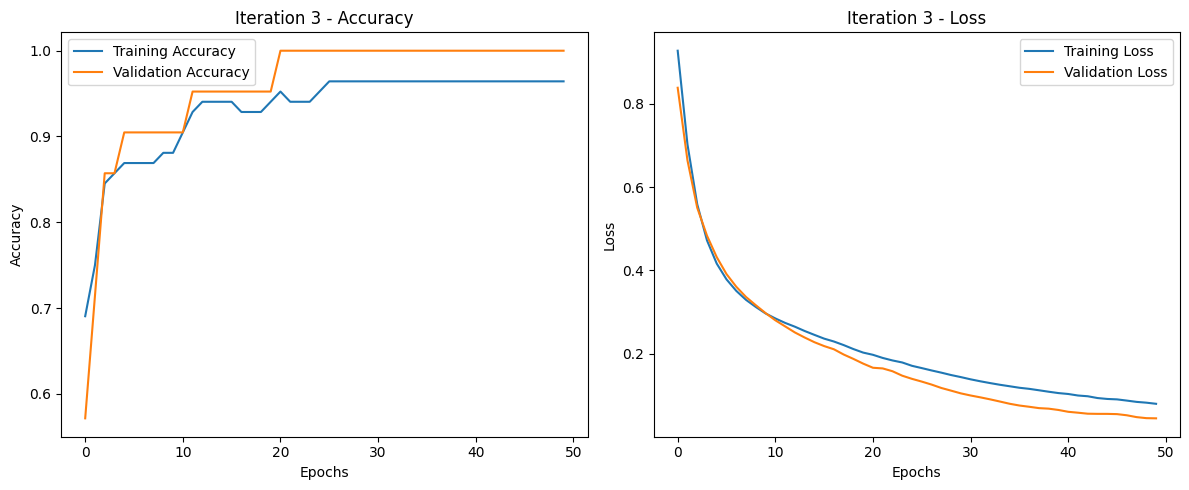


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8750
  recall: 0.9333
  f1-score: 0.9032
  support: 15.0000
2:
  precision: 0.9286
  recall: 0.8667
  f1-score: 0.8966
  support: 15.0000
accuracy: 0.9333
macro avg:
  precision: 0.9345
  recall: 0.9333
  f1-score: 0.9333
  support: 45.0000
weighted avg:
  precision: 0.9345
  recall: 0.9333
  f1-score: 0.9333
  support: 45.0000


In [11]:
def piecewise_activation(x):
    return tf.keras.activations.elu(x)

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**Leaky RELU**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


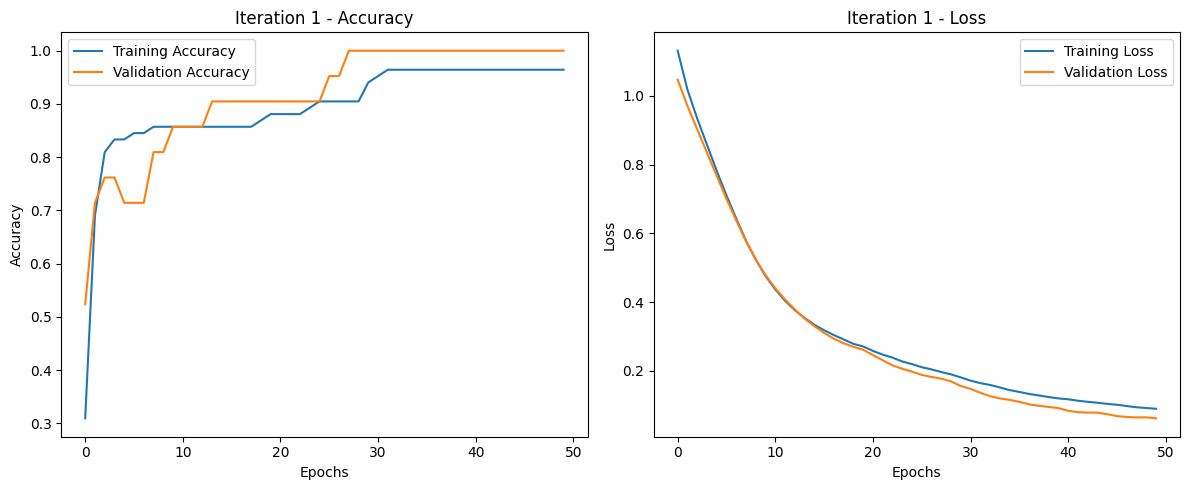

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


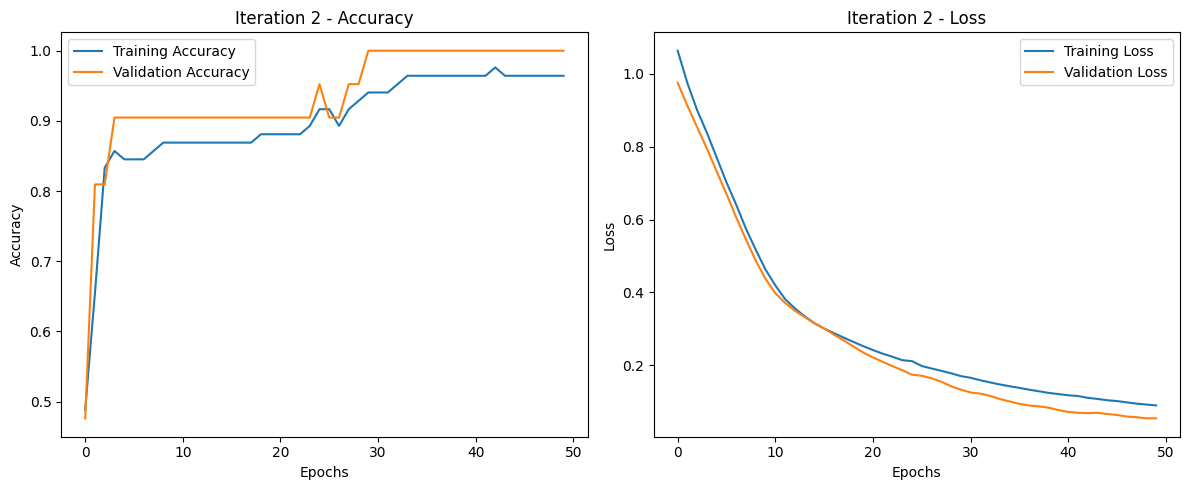

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


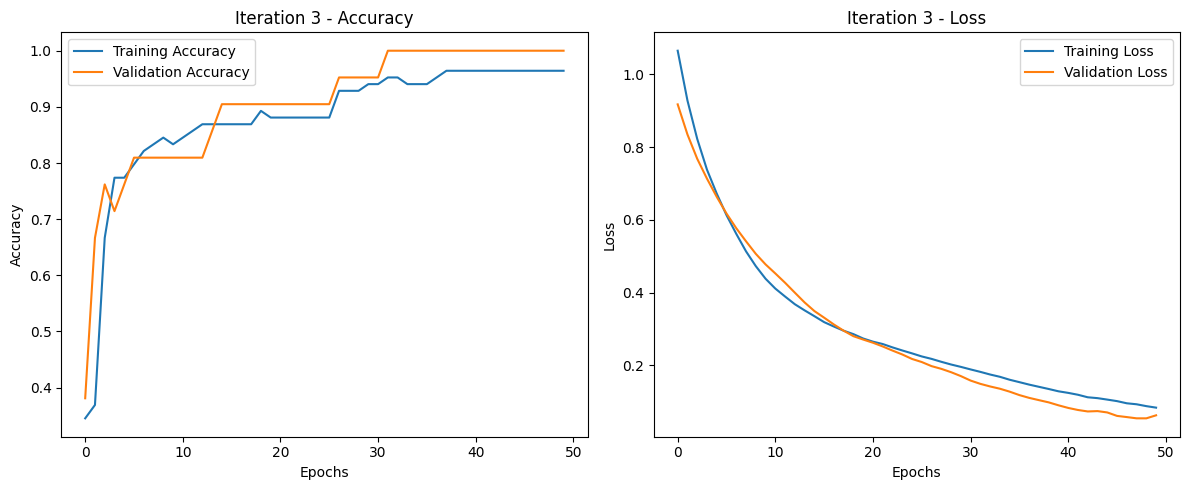


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8773
  recall: 0.9333
  f1-score: 0.9039
  support: 15.0000
2:
  precision: 0.9283
  recall: 0.8667
  f1-score: 0.8957
  support: 15.0000
accuracy: 0.9333
macro avg:
  precision: 0.9352
  recall: 0.9333
  f1-score: 0.9332
  support: 45.0000
weighted avg:
  precision: 0.9352
  recall: 0.9333
  f1-score: 0.9332
  support: 45.0000


In [12]:
def piecewise_activation(x):
    return tf.where(x > 0, x, 0.01*(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-Tanh**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


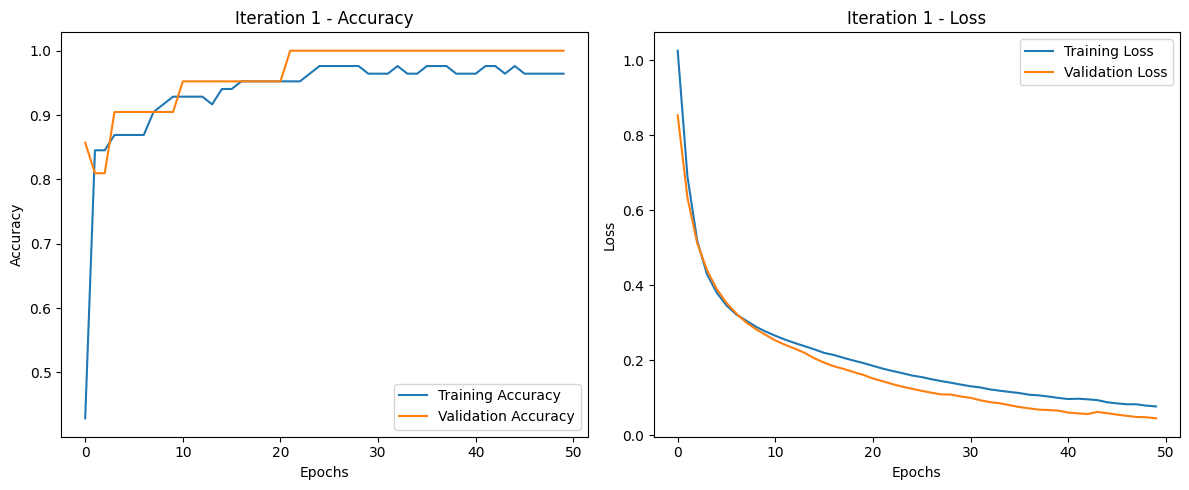

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


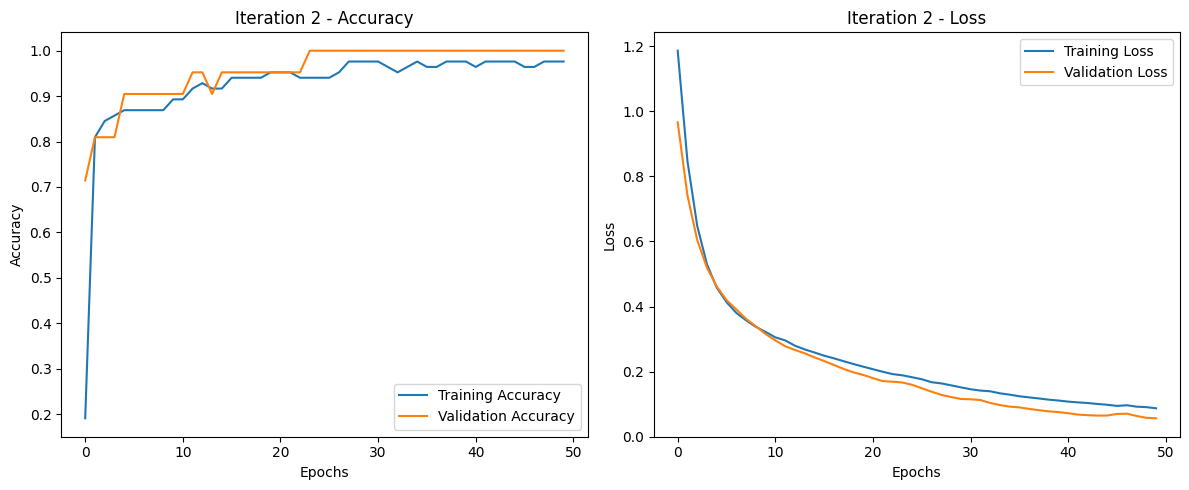

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


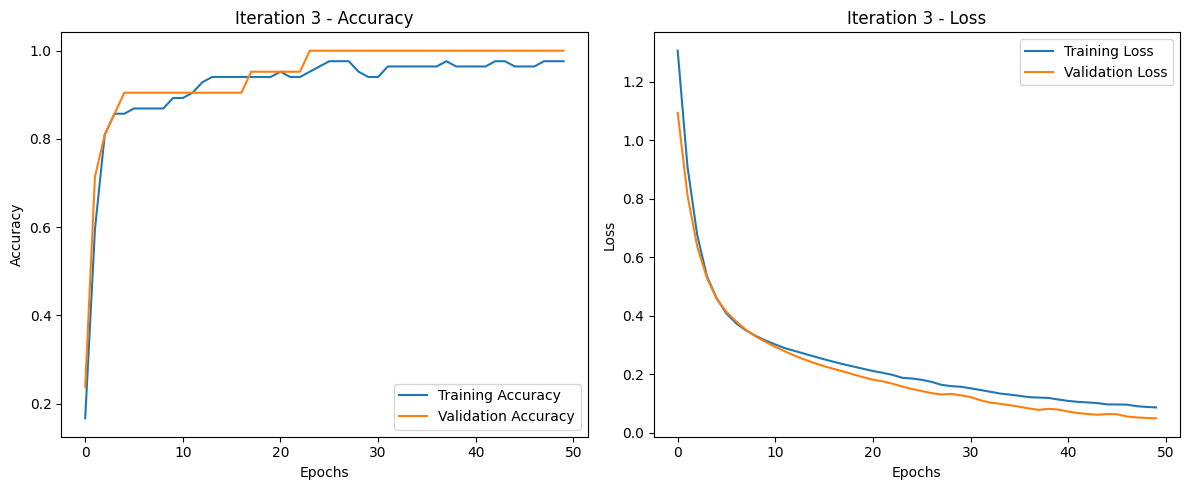


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8235
  recall: 0.9333
  f1-score: 0.8750
  support: 15.0000
2:
  precision: 0.9231
  recall: 0.8000
  f1-score: 0.8571
  support: 15.0000
accuracy: 0.9111
macro avg:
  precision: 0.9155
  recall: 0.9111
  f1-score: 0.9107
  support: 45.0000
weighted avg:
  precision: 0.9155
  recall: 0.9111
  f1-score: 0.9107
  support: 45.0000


In [13]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.tanh(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-Sigmoid**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


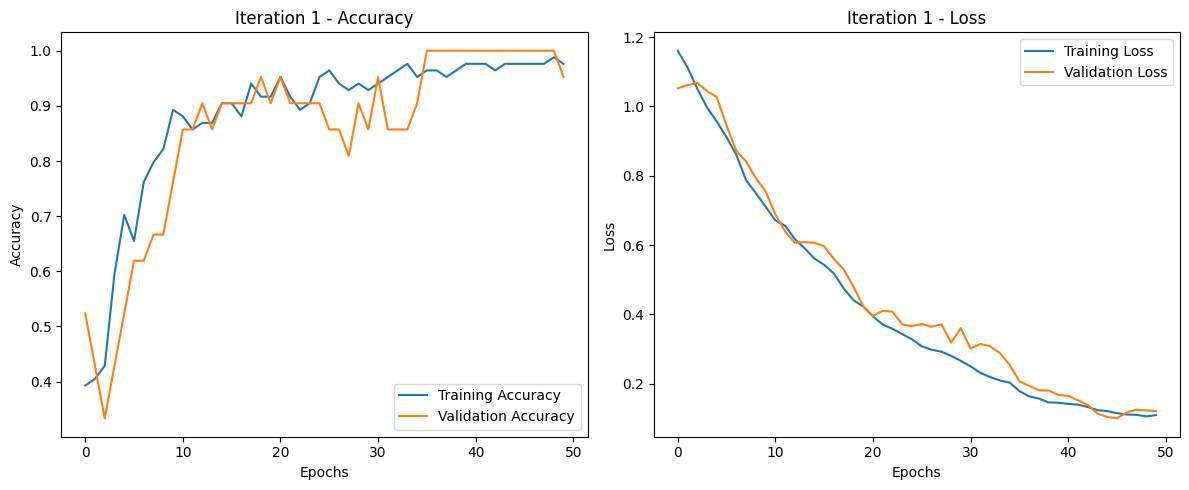

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


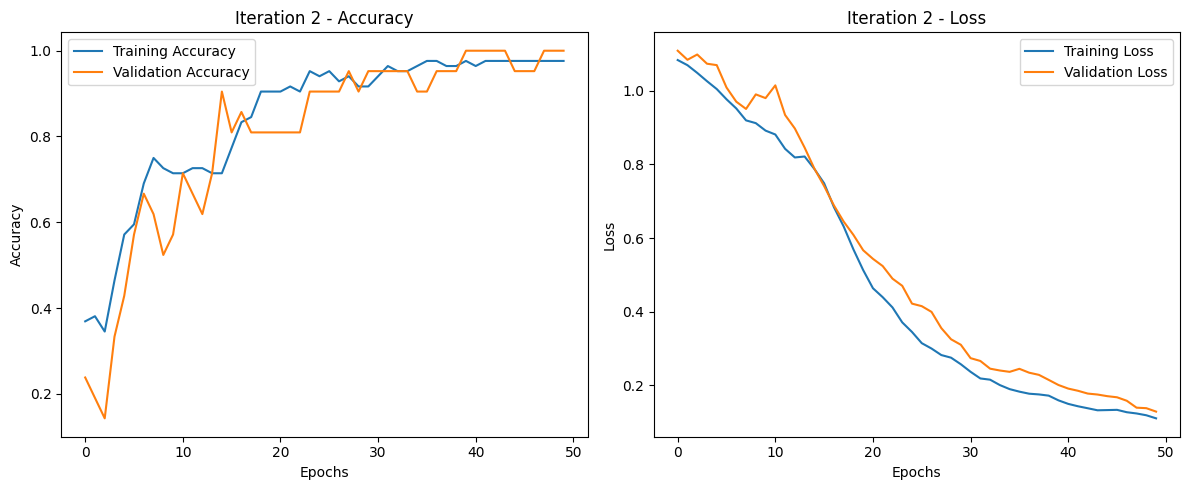

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


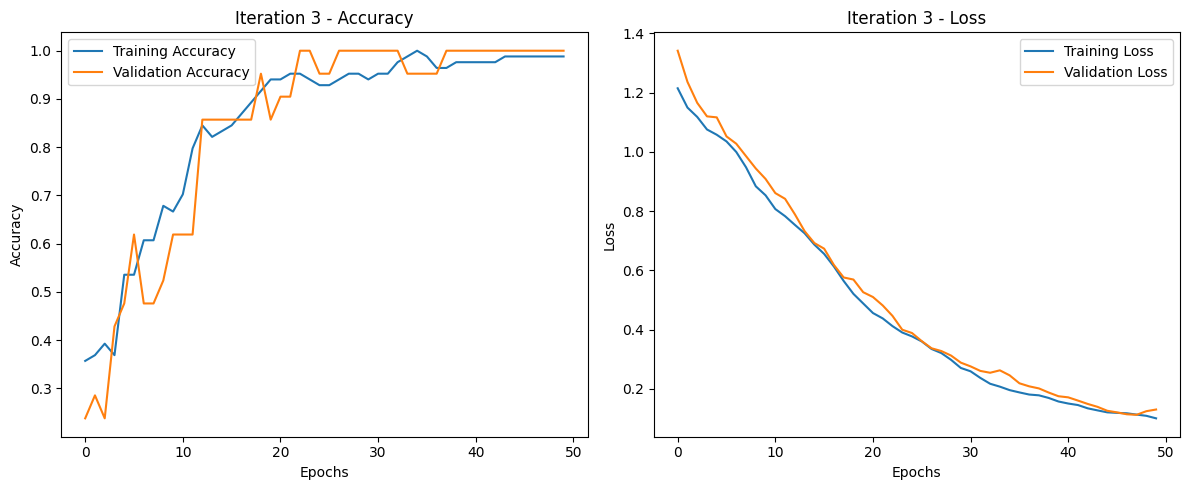


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8611
  recall: 0.9556
  f1-score: 0.9052
  support: 15.0000
2:
  precision: 0.9524
  recall: 0.8444
  f1-score: 0.8940
  support: 15.0000
accuracy: 0.9333
macro avg:
  precision: 0.9378
  recall: 0.9333
  f1-score: 0.9331
  support: 45.0000
weighted avg:
  precision: 0.9378
  recall: 0.9333
  f1-score: 0.9331
  support: 45.0000


In [14]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.sigmoid(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-Swish**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


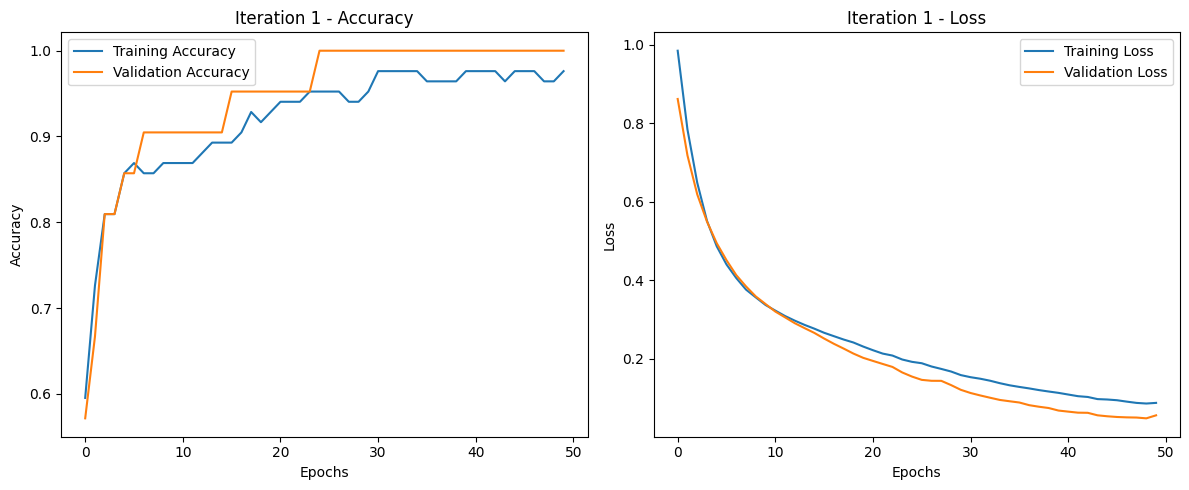

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step


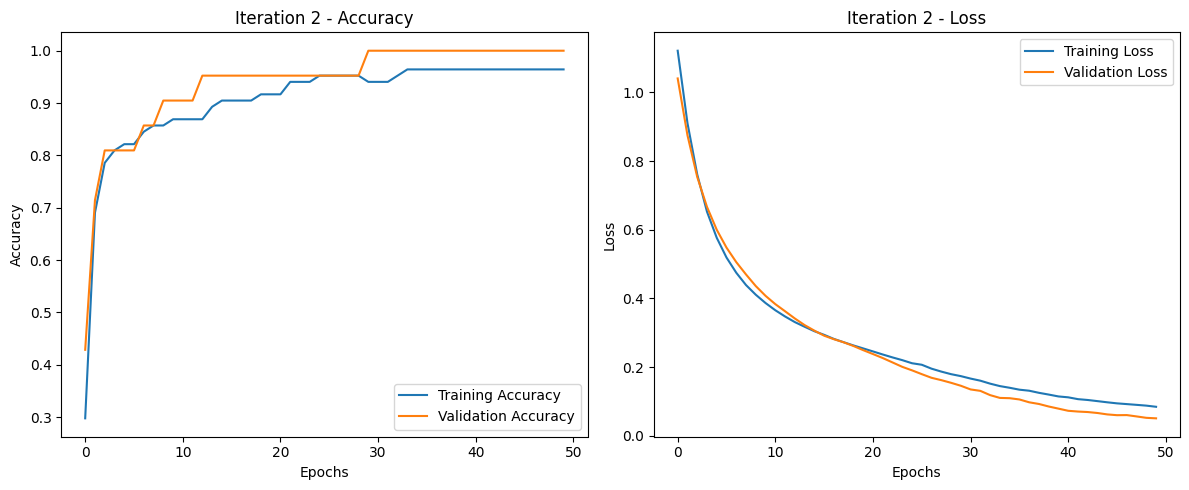

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


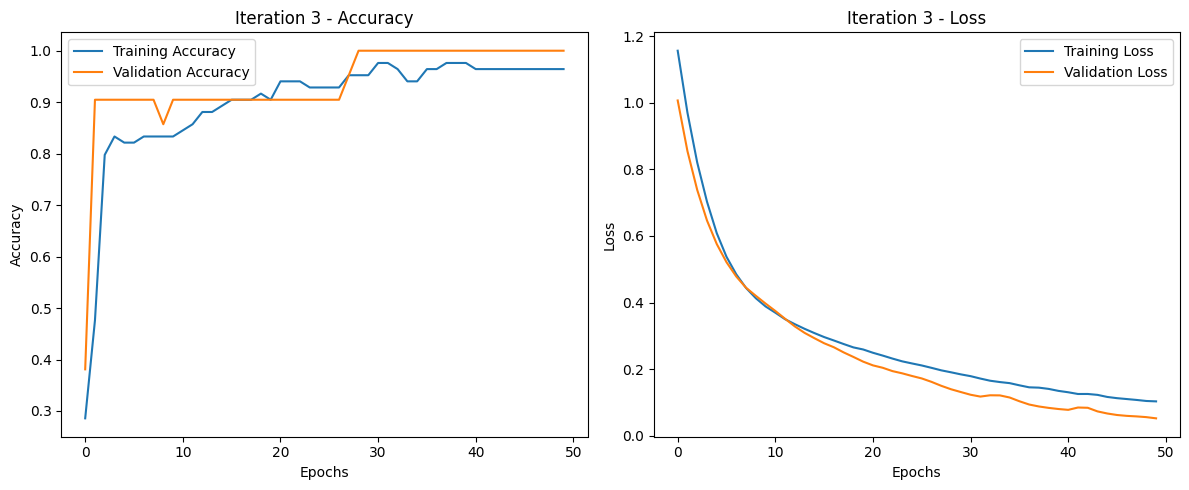


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8379
  recall: 0.9111
  f1-score: 0.8722
  support: 15.0000
2:
  precision: 0.9043
  recall: 0.8222
  f1-score: 0.8603
  support: 15.0000
accuracy: 0.9111
macro avg:
  precision: 0.9141
  recall: 0.9111
  f1-score: 0.9108
  support: 45.0000
weighted avg:
  precision: 0.9141
  recall: 0.9111
  f1-score: 0.9108
  support: 45.0000


In [15]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.swish(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-softsign**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


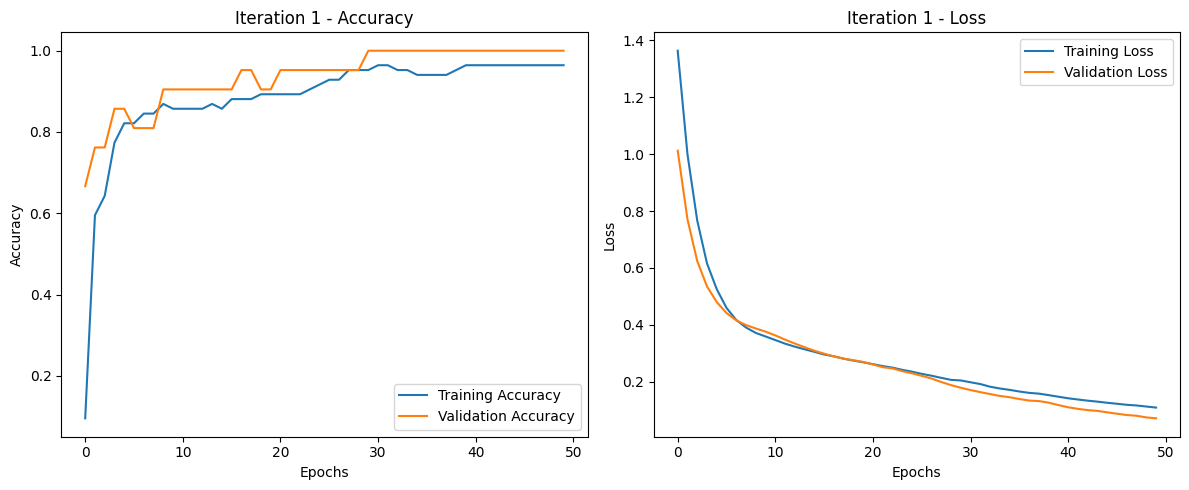

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


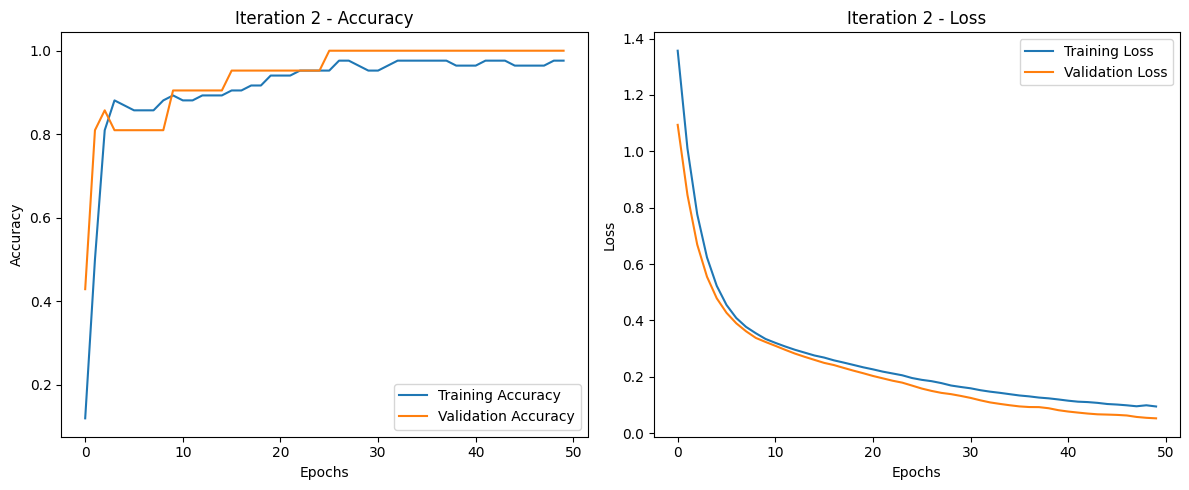

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


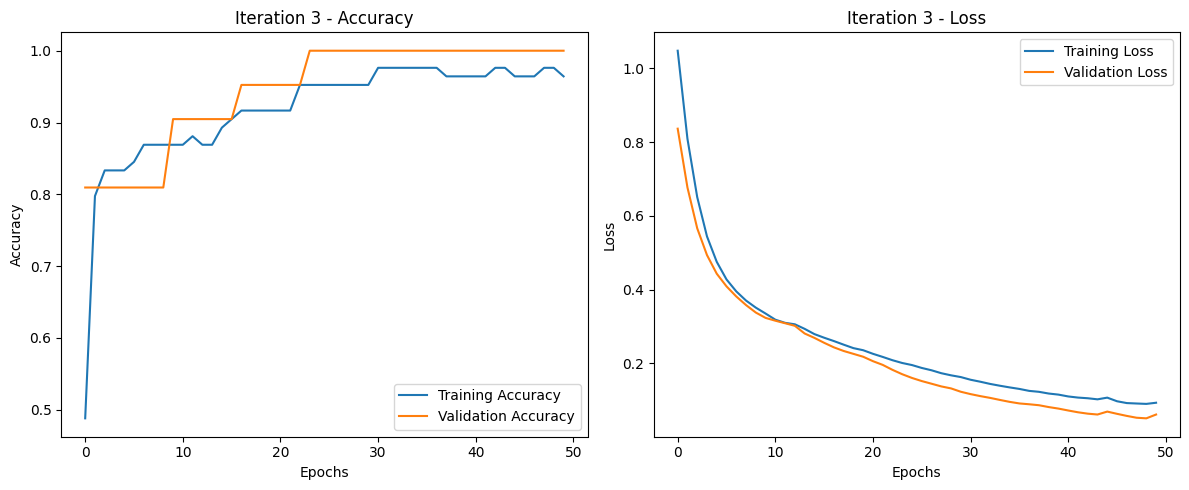


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8578
  recall: 0.9333
  f1-score: 0.8938
  support: 15.0000
2:
  precision: 0.9267
  recall: 0.8444
  f1-score: 0.8834
  support: 15.0000
accuracy: 0.9259
macro avg:
  precision: 0.9282
  recall: 0.9259
  f1-score: 0.9257
  support: 45.0000
weighted avg:
  precision: 0.9282
  recall: 0.9259
  f1-score: 0.9257
  support: 45.0000


In [16]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.softsign(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-softplus**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


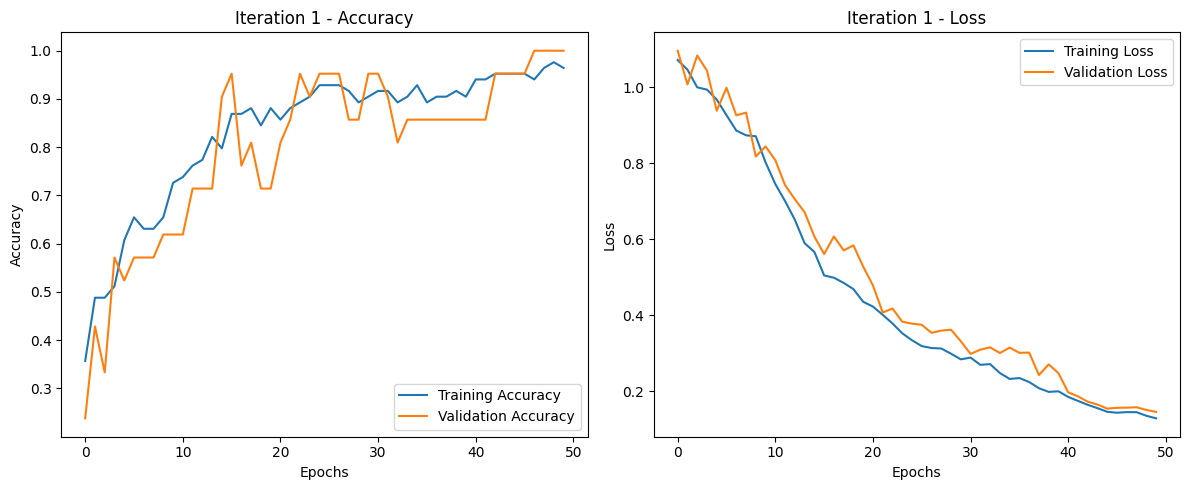

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


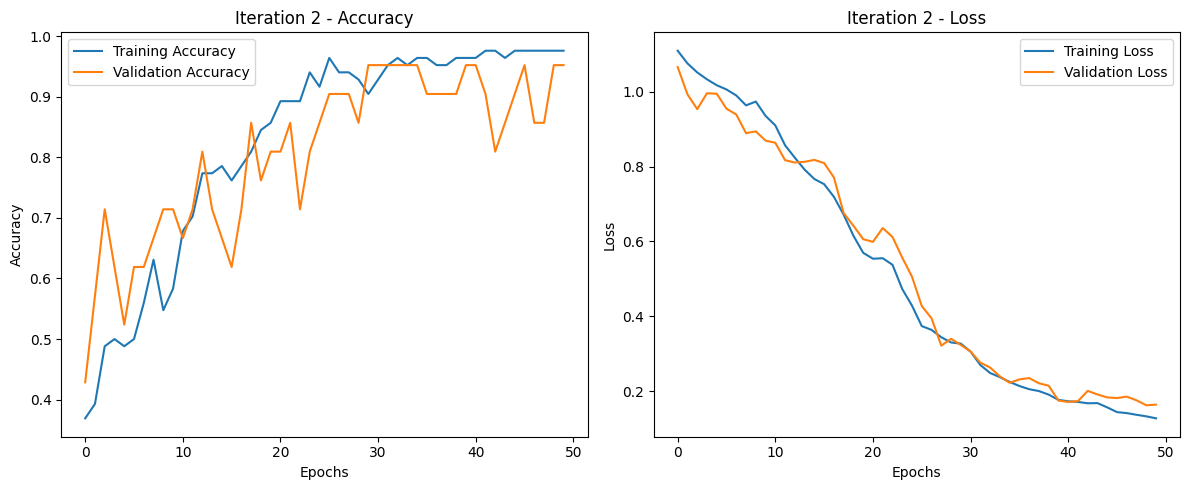

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


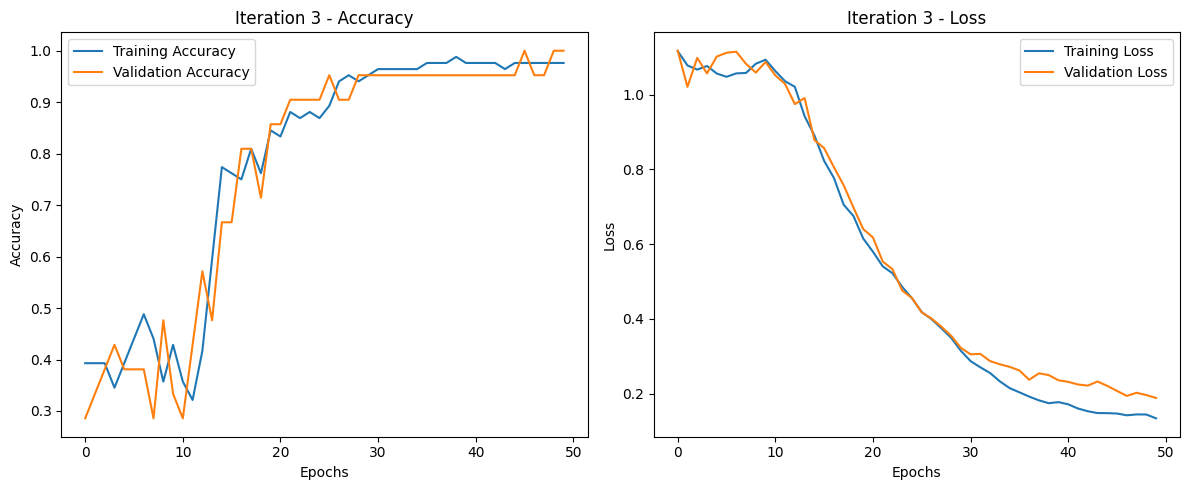


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8157
  recall: 0.8889
  f1-score: 0.8500
  support: 15.0000
2:
  precision: 0.8821
  recall: 0.8000
  f1-score: 0.8381
  support: 15.0000
accuracy: 0.8963
macro avg:
  precision: 0.8992
  recall: 0.8963
  f1-score: 0.8960
  support: 45.0000
weighted avg:
  precision: 0.8992
  recall: 0.8963
  f1-score: 0.8960
  support: 45.0000


In [17]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.softplus(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-Softmax**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


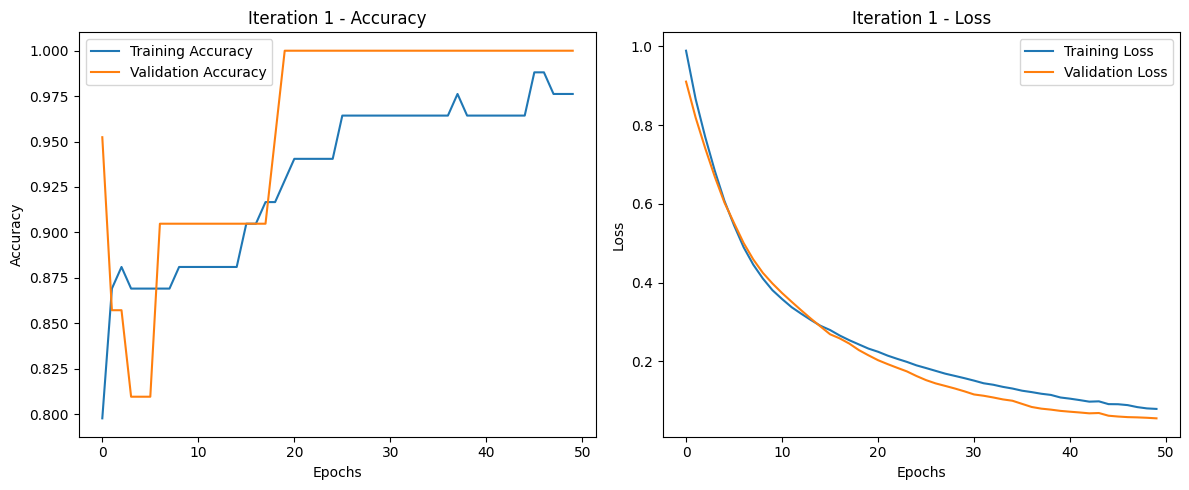

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


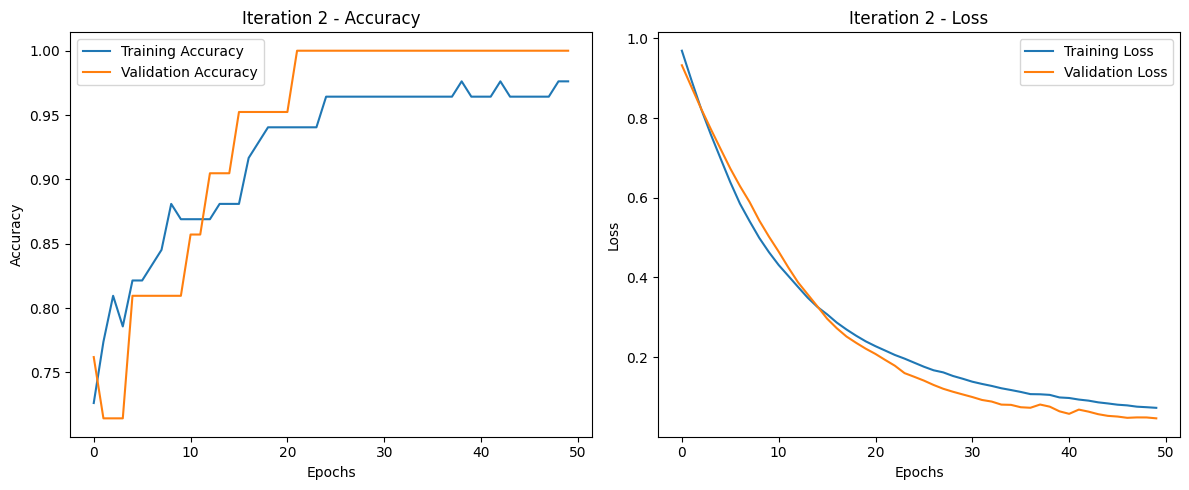

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


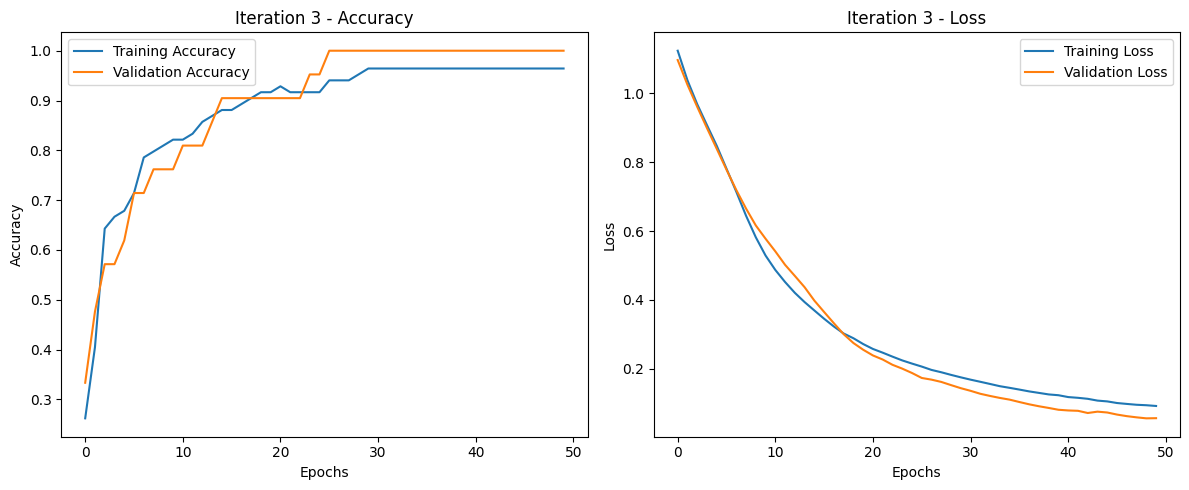


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8578
  recall: 0.9333
  f1-score: 0.8938
  support: 15.0000
2:
  precision: 0.9267
  recall: 0.8444
  f1-score: 0.8834
  support: 15.0000
accuracy: 0.9259
macro avg:
  precision: 0.9282
  recall: 0.9259
  f1-score: 0.9257
  support: 45.0000
weighted avg:
  precision: 0.9282
  recall: 0.9259
  f1-score: 0.9257
  support: 45.0000


In [18]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.softmax(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-SELU**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


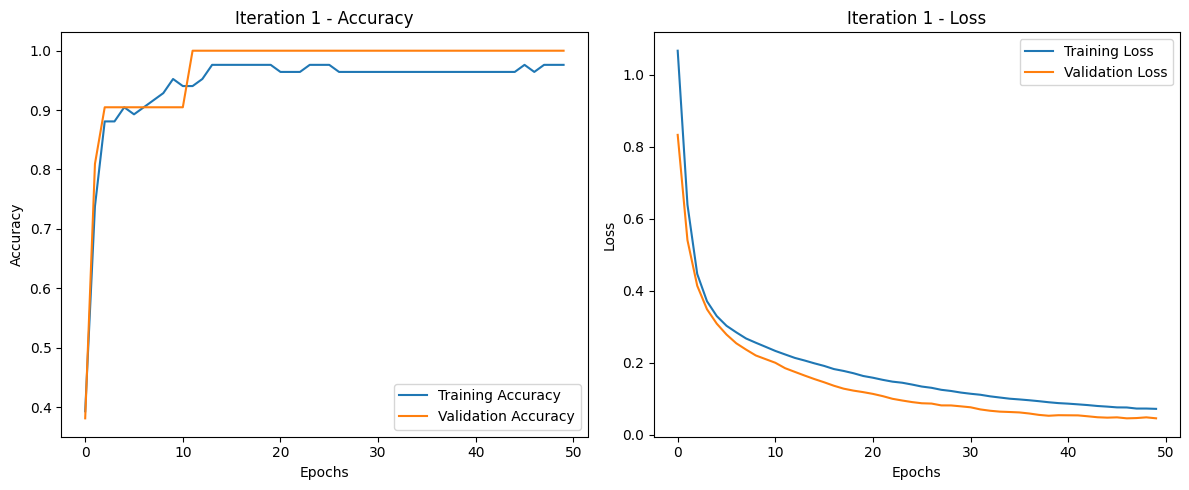

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


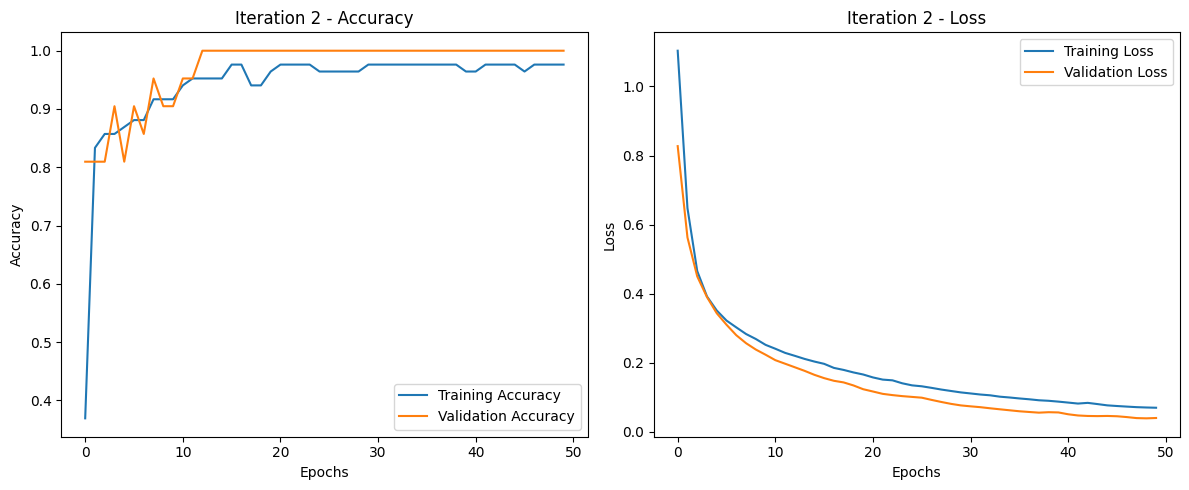

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


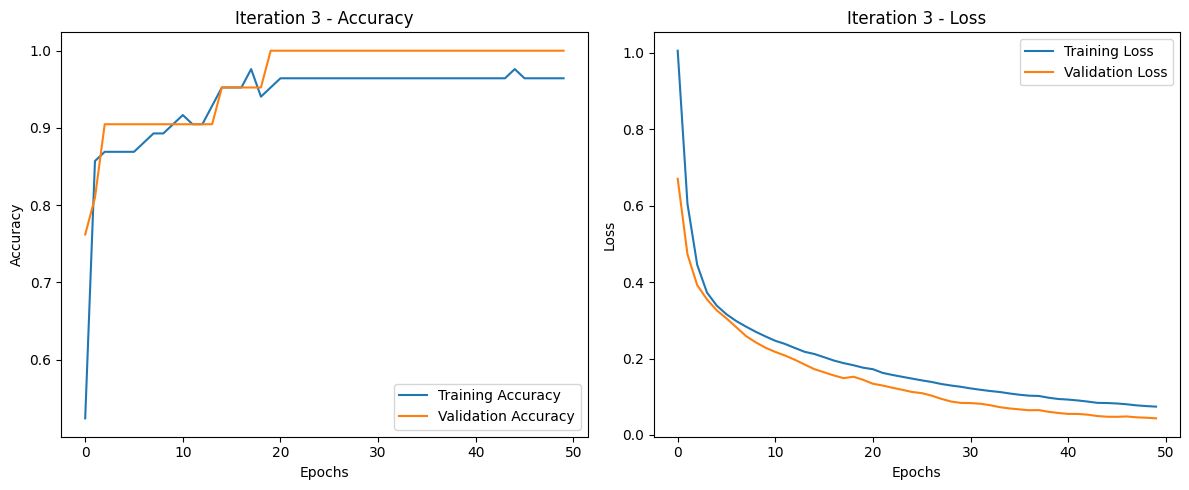


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8578
  recall: 0.9333
  f1-score: 0.8938
  support: 15.0000
2:
  precision: 0.9267
  recall: 0.8444
  f1-score: 0.8834
  support: 15.0000
accuracy: 0.9259
macro avg:
  precision: 0.9282
  recall: 0.9259
  f1-score: 0.9257
  support: 45.0000
weighted avg:
  precision: 0.9282
  recall: 0.9259
  f1-score: 0.9257
  support: 45.0000


In [19]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.selu(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-Mish**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


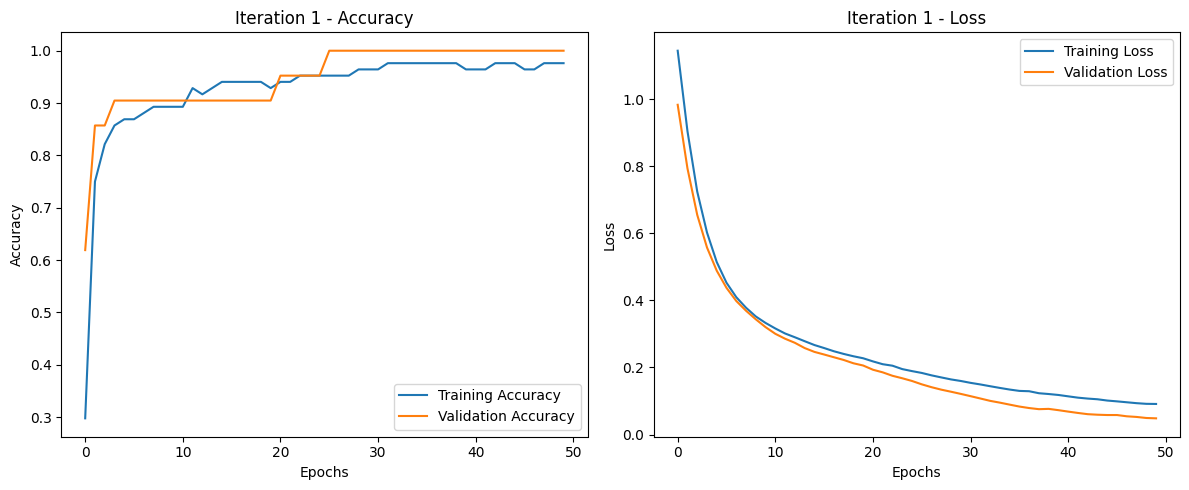

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


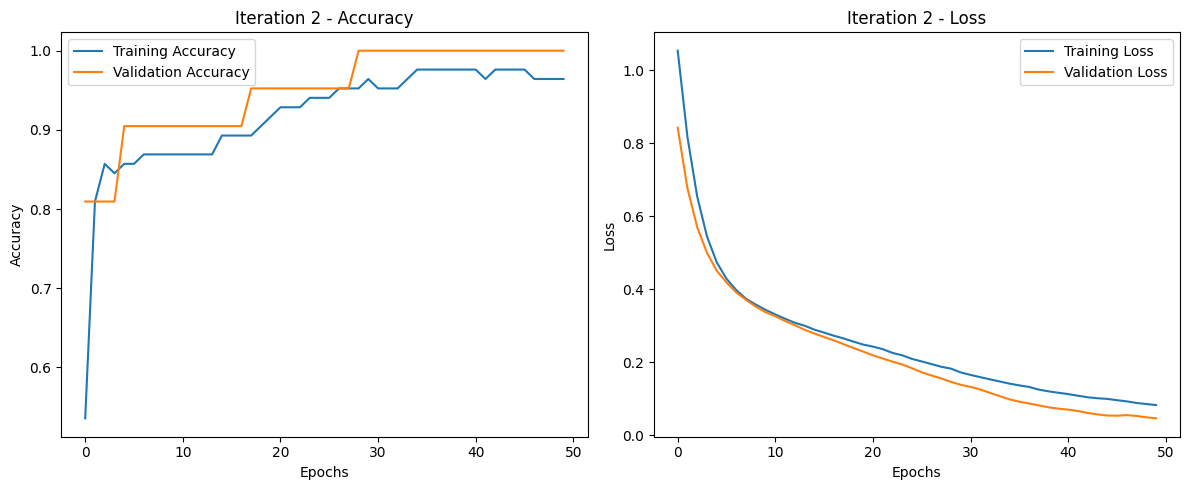

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


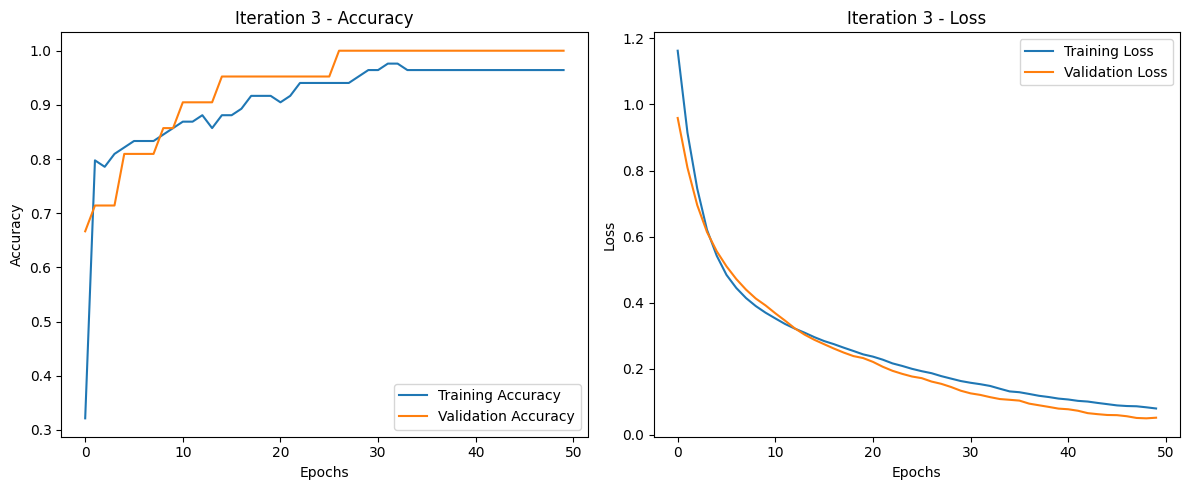


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8601
  recall: 0.9333
  f1-score: 0.8944
  support: 15.0000
2:
  precision: 0.9265
  recall: 0.8444
  f1-score: 0.8825
  support: 15.0000
accuracy: 0.9259
macro avg:
  precision: 0.9289
  recall: 0.9259
  f1-score: 0.9257
  support: 45.0000
weighted avg:
  precision: 0.9289
  recall: 0.9259
  f1-score: 0.9257
  support: 45.0000


In [20]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.mish(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-linear**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


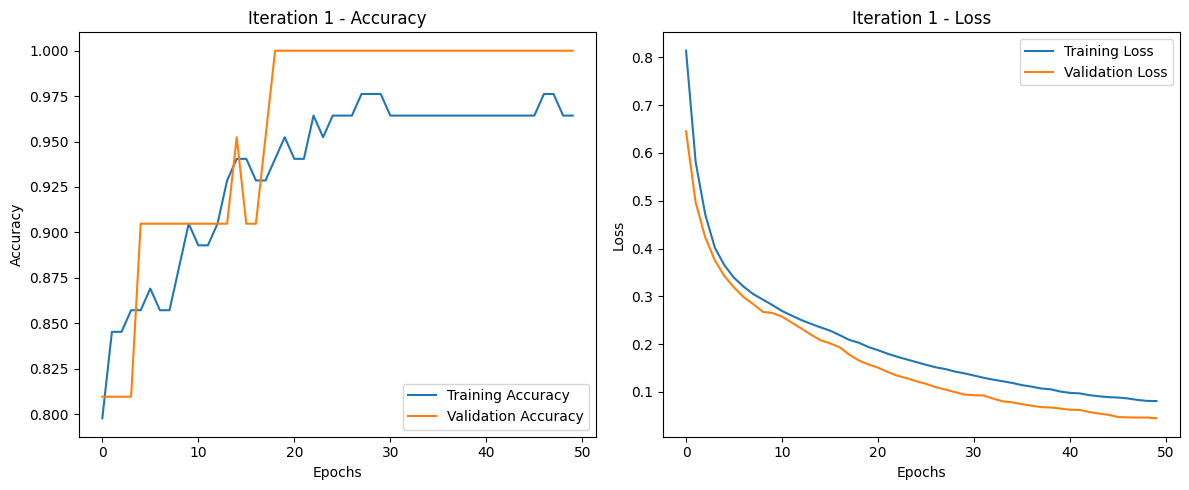

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


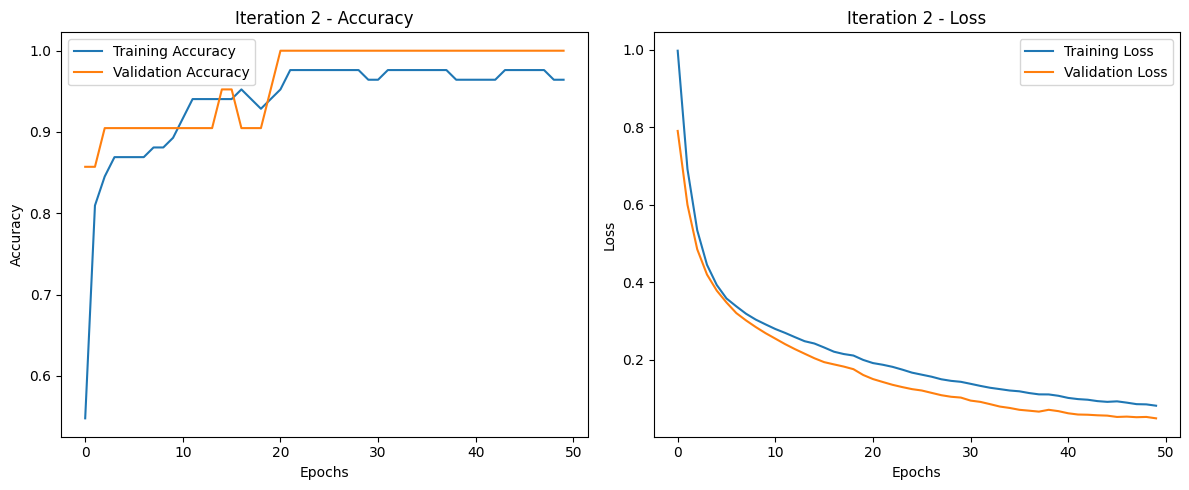

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


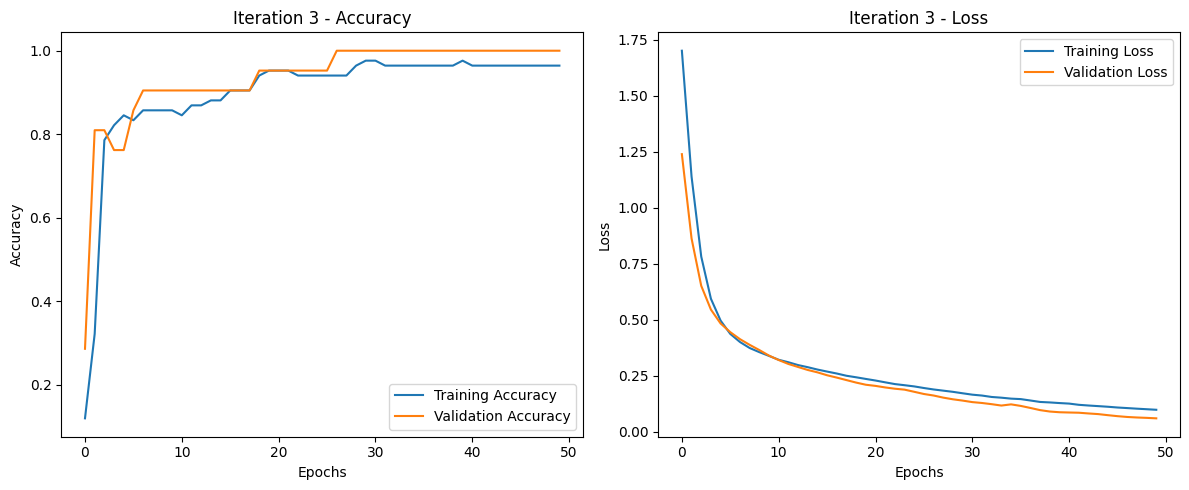


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8750
  recall: 0.9333
  f1-score: 0.9032
  support: 15.0000
2:
  precision: 0.9286
  recall: 0.8667
  f1-score: 0.8966
  support: 15.0000
accuracy: 0.9333
macro avg:
  precision: 0.9345
  recall: 0.9333
  f1-score: 0.9333
  support: 45.0000
weighted avg:
  precision: 0.9345
  recall: 0.9333
  f1-score: 0.9333
  support: 45.0000


In [21]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.linear(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-LeakyRELU**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


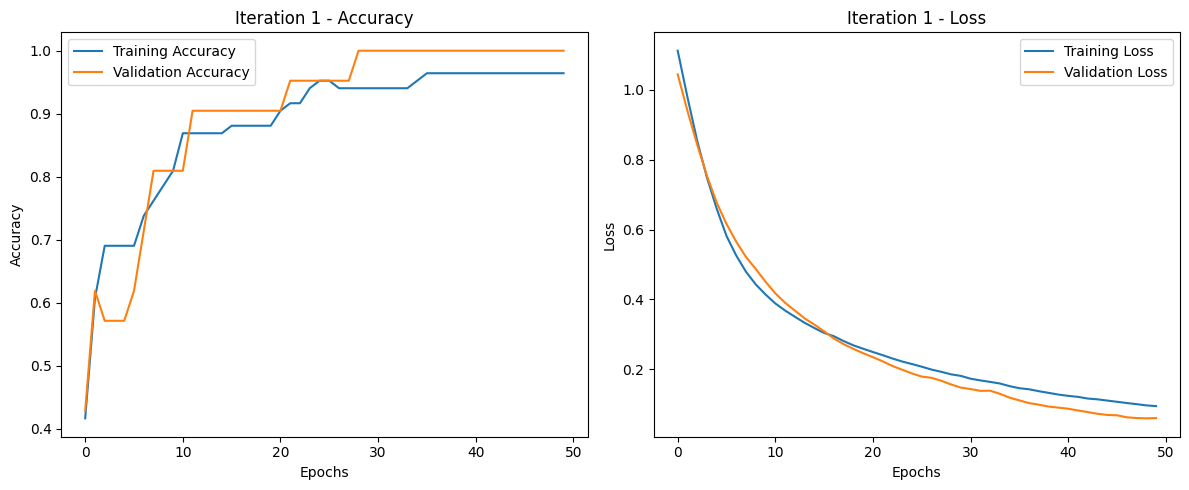

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


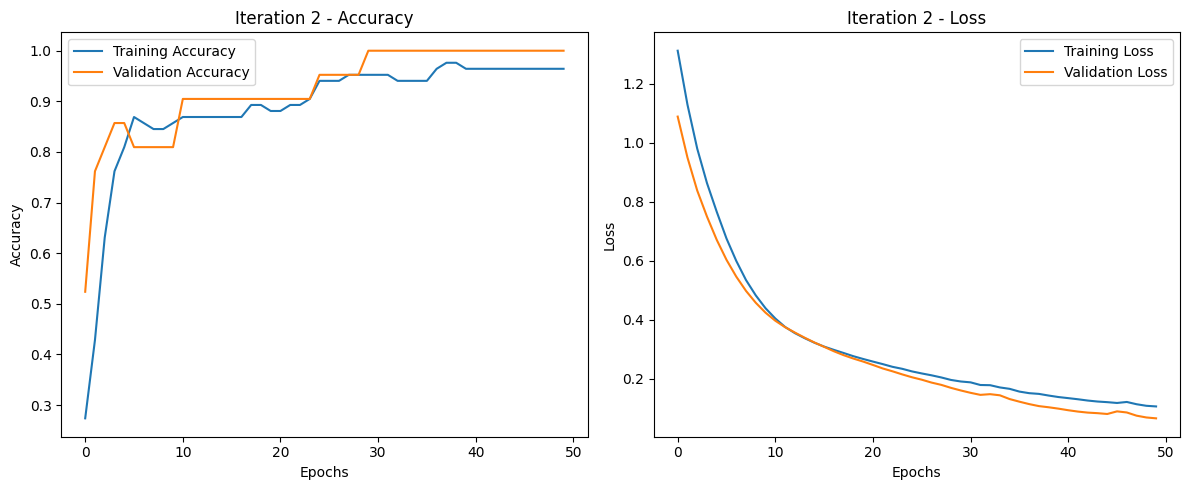

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


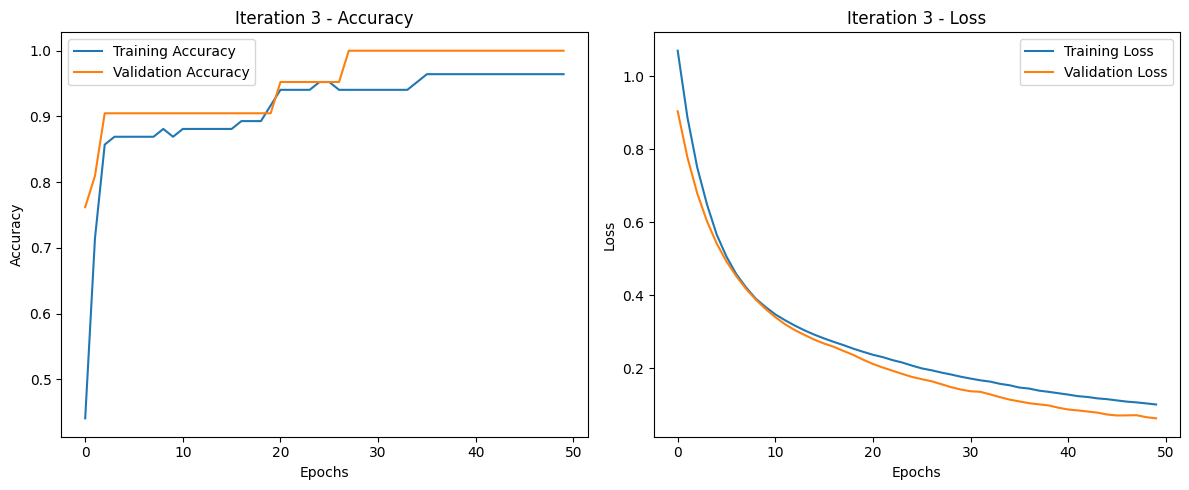


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8235
  recall: 0.9333
  f1-score: 0.8750
  support: 15.0000
2:
  precision: 0.9231
  recall: 0.8000
  f1-score: 0.8571
  support: 15.0000
accuracy: 0.9111
macro avg:
  precision: 0.9155
  recall: 0.9111
  f1-score: 0.9107
  support: 45.0000
weighted avg:
  precision: 0.9155
  recall: 0.9111
  f1-score: 0.9107
  support: 45.0000


In [22]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.leaky_relu(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-Expo**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


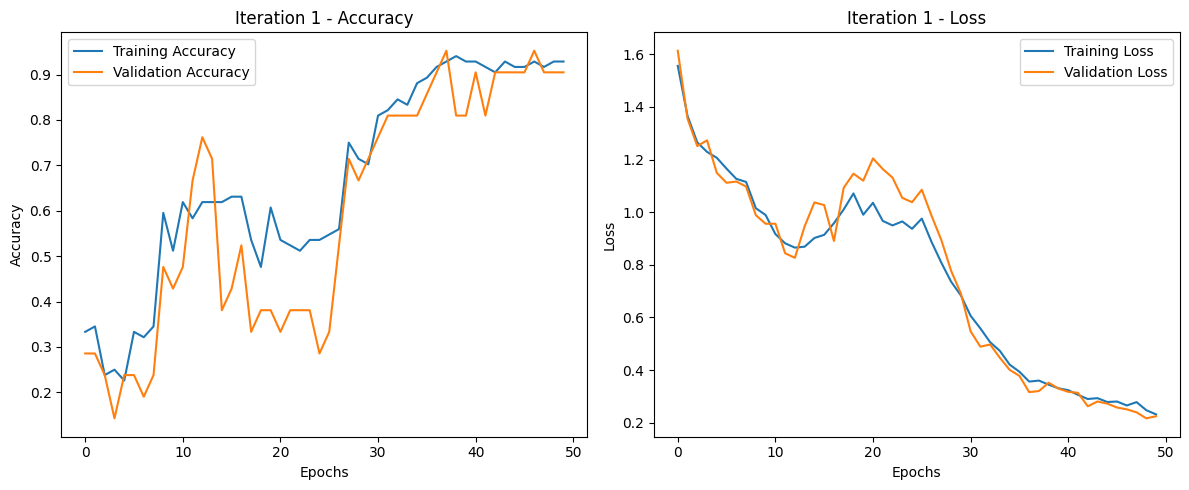

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


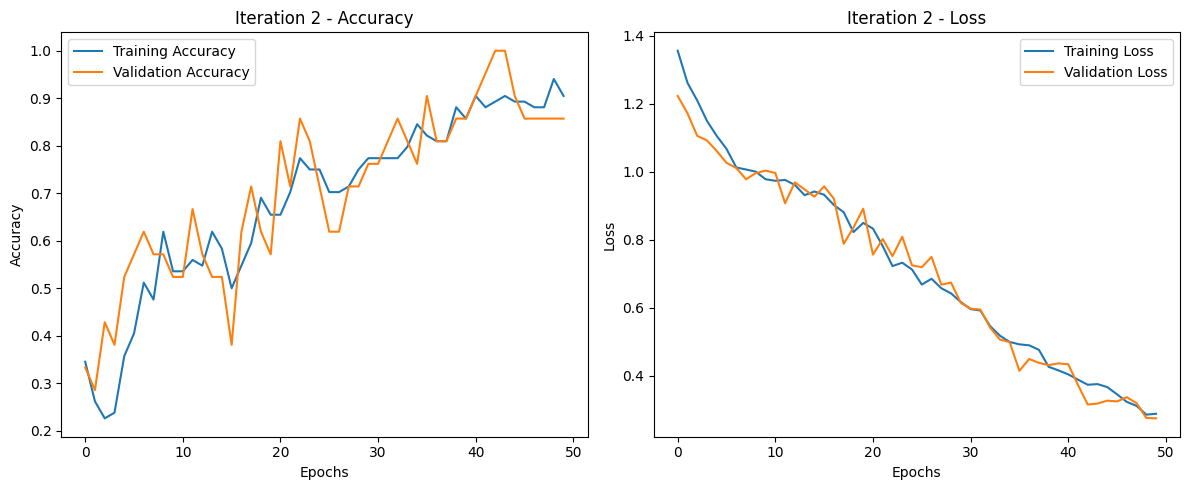

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


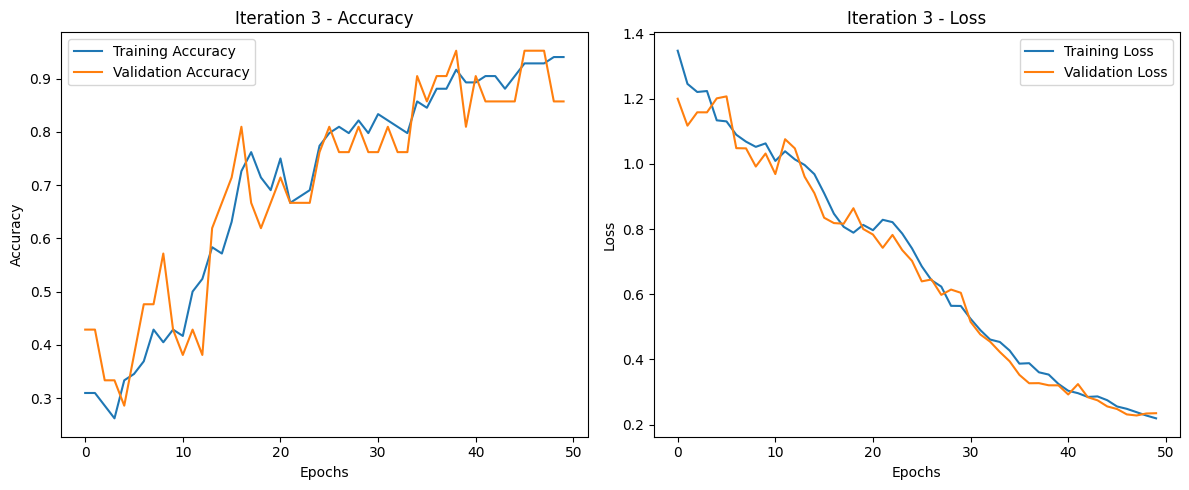


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.7591
  recall: 0.7556
  f1-score: 0.7557
  support: 15.0000
2:
  precision: 0.7564
  recall: 0.7556
  f1-score: 0.7542
  support: 15.0000
accuracy: 0.8370
macro avg:
  precision: 0.8385
  recall: 0.8370
  f1-score: 0.8367
  support: 45.0000
weighted avg:
  precision: 0.8385
  recall: 0.8370
  f1-score: 0.8367
  support: 45.0000


In [23]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.exponential(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()

**RELU-ELU**

Iteration 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


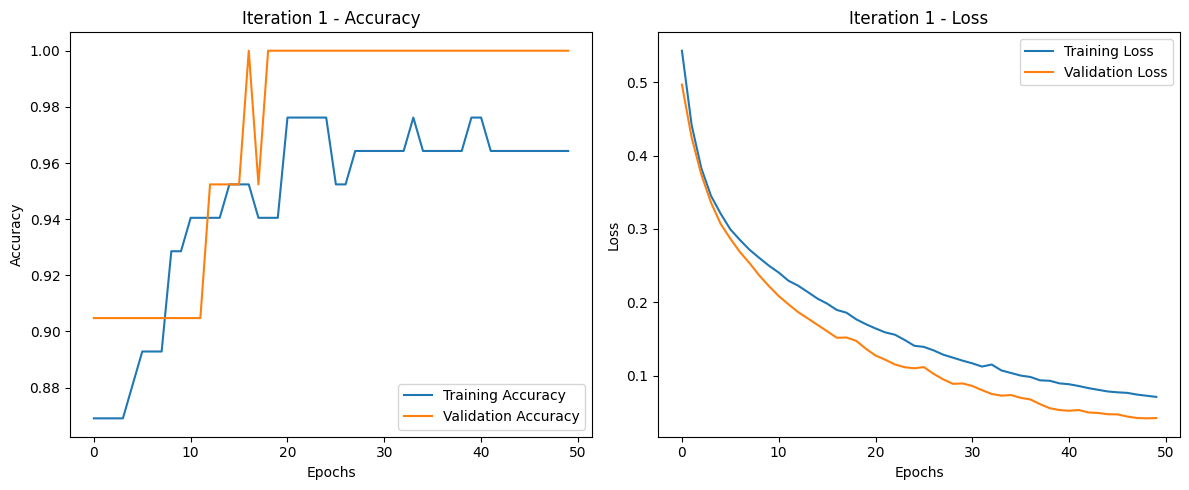

Iteration 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


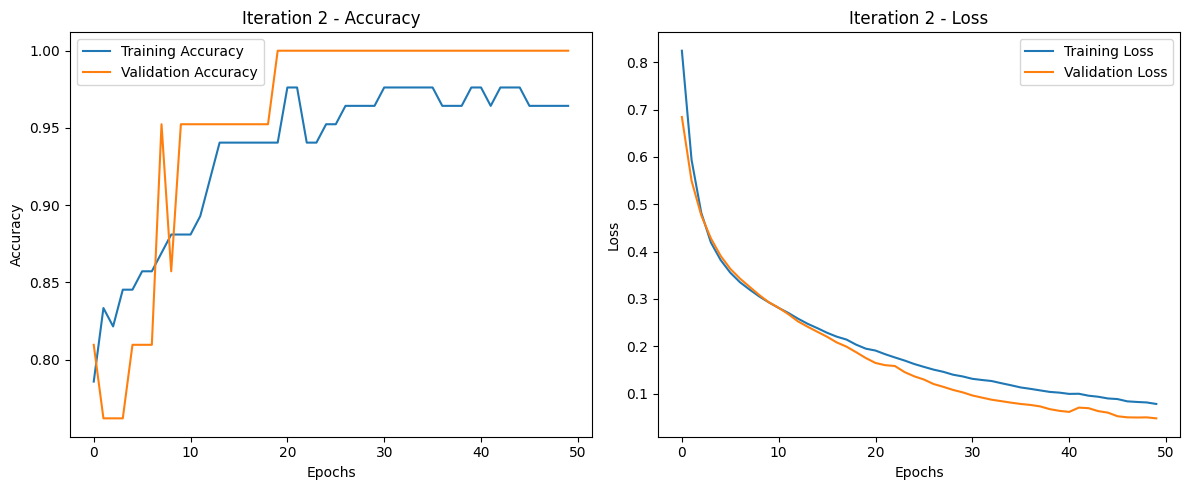

Iteration 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


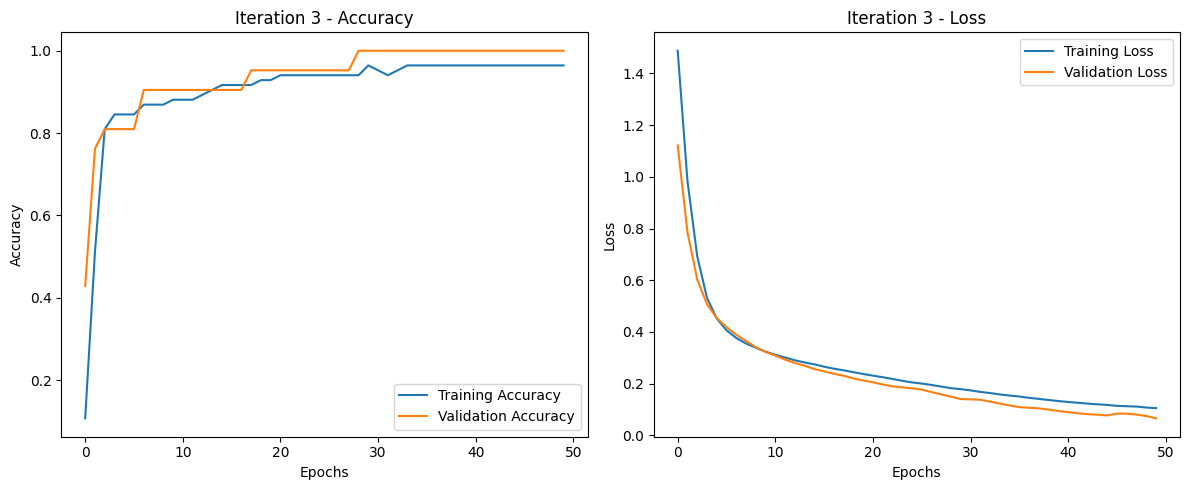


Average Classification Report:
0:
  precision: 1.0000
  recall: 1.0000
  f1-score: 1.0000
  support: 15.0000
1:
  precision: 0.8750
  recall: 0.9333
  f1-score: 0.9032
  support: 15.0000
2:
  precision: 0.9286
  recall: 0.8667
  f1-score: 0.8966
  support: 15.0000
accuracy: 0.9333
macro avg:
  precision: 0.9345
  recall: 0.9333
  f1-score: 0.9333
  support: 45.0000
weighted avg:
  precision: 0.9345
  recall: 0.9333
  f1-score: 0.9333
  support: 45.0000


In [24]:
def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.elu(x))

class PiecewiseActivation(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PiecewiseActivation, self).__init__(**kwargs)

    def call(self, inputs):
        return piecewise_activation(inputs)

# Load and preprocess the Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess_data(X_iris, y_iris)

# Step 3: Build the model
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=PiecewiseActivation(), input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation=PiecewiseActivation()),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Train and evaluate
def train_and_evaluate(num_iterations=3):
    reports = []
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        model = create_model(X_train_iris.shape[1], y_train_iris.shape[1])
        history = model.fit(
            X_train_iris, y_train_iris, epochs=50, batch_size=16, verbose=0, validation_split=0.2
        )

        # Evaluate
        predictions = model.predict(X_test_iris)
        y_test_labels = np.argmax(y_test_iris, axis=1)
        y_pred_labels = np.argmax(predictions, axis=1)

        # Collect classification report
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        reports.append(report)

        # Plot training and validation accuracy for this iteration
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Iteration {iteration + 1} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss for this iteration
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Iteration {iteration + 1} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Average classification report
    avg_report = {}
    for key in reports[0]:
        if isinstance(reports[0][key], dict):  # For class-specific metrics
            avg_report[key] = {
                metric: np.mean([r[key][metric] for r in reports if key in r and metric in r[key]])
                for metric in reports[0][key]
            }
        else:  # For overall metrics (e.g., 'accuracy')
            avg_report[key] = np.mean([r[key] for r in reports if key in r])

    print("\nAverage Classification Report:")
    for key, metrics in avg_report.items():
        if isinstance(metrics, dict):
            print(f"{key}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        else:
            print(f"{key}: {metrics:.4f}")

# Run the evaluation
train_and_evaluate()